In [24]:
library(lubridate) # For handling Date variables
library(ggplot2)
library(scales) # For percent_format()
library(RColorBrewer)
library(TTR) # for EMA (Exponential Moving Average)
library(cowplot)

In [25]:
library(ggpubr)
theme_set(theme_pubr())

In [26]:
df_dist1 <- read.csv(file="sargento-meteo_14-18.csv", sep=",", header=TRUE, skip=3, stringsAsFactors=FALSE)

In [27]:
df <- df_dist1[c(1,2,5,6,7,14,16)]
names(df) <- c("Fecha", "Hora", "AirTemp", "RH", "Precip", "NetRad", "SoilT10")

In [28]:
df$NewDate <- as.POSIXct(paste0(df$Fecha, df$Hora),format="%d/%m/%Y %H:%M")

In [29]:
df1 <- df[c(8,3,4,5,6,7)]
names(df1) <- c("NDate", "AirTemp", "RH", "Precip", "NetRad", "SoilT10")

In [30]:
df$NMonth <- factor(month(df1$NDate), 
                          labels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"))
#v1 <- (df1$NDate)
#df2 <- transform(df1, Year = year(v1), Month = month.abb[month(v1)])

In [31]:
str(df)

'data.frame':	202970 obs. of  9 variables:
 $ Fecha  : chr  "27/04/2014" "27/04/2014" "27/04/2014" "27/04/2014" ...
 $ Hora   : chr  "19:40:00" "19:50:00" "20:00:00" "20:10:00" ...
 $ AirTemp: num  28 27.9 27.8 27.8 27.8 ...
 $ RH     : num  23.3 23.9 25.1 25.5 25.6 ...
 $ Precip : num  0 0 0 0 0 0 0 0 0 0 ...
 $ NetRad : num  2.89 2.144 1.16 0.381 0.919 ...
 $ SoilT10: num  27.9 27.7 27.6 27.8 27.8 ...
 $ NewDate: POSIXct, format: "2014-04-27 19:40:00" "2014-04-27 19:50:00" ...
 $ NMonth : Factor w/ 12 levels "Jan","Feb","Mar",..: 4 4 4 4 4 4 4 4 4 4 ...


In [32]:
require(dplyr)
df_meteo2014 <- filter(df, year(NewDate) == 2014)

df_meteo2014 <- filter(df_meteo2014, 
       minute(NewDate) == 00 | minute(NewDate) == 30 )
df_meteo2014 <- df_meteo2014[-1, ]
str(df_meteo2014)

'data.frame':	9310 obs. of  9 variables:
 $ Fecha  : chr  "27/04/2014" "27/04/2014" "27/04/2014" "27/04/2014" ...
 $ Hora   : chr  "20:30:00" "21:00:00" "21:30:00" "22:00:00" ...
 $ AirTemp: num  27.8 26.3 26.4 25.4 25.8 ...
 $ RH     : num  25.7 27.8 27.3 28 28 ...
 $ Precip : num  0 0 0 0 0 0 0 0 0 0 ...
 $ NetRad : num  0.899 -1.06 -1.413 -1.269 0.084 ...
 $ SoilT10: num  27.7 26.2 25.8 25.4 26.3 ...
 $ NewDate: POSIXct, format: "2014-04-27 20:30:00" "2014-04-27 21:00:00" ...
 $ NMonth : Factor w/ 12 levels "Jan","Feb","Mar",..: 4 4 4 4 4 4 4 4 4 4 ...


In [33]:
require(dplyr)
df_meteo2015 <- filter(df, year(NewDate) == 2015)

df_meteo2015 <- filter(df_meteo2015, 
       minute(NewDate) == 00 | minute(NewDate) == 30 )
df_meteo2015 <- df_meteo2015[-1, ]
str(df_meteo2015)

'data.frame':	17518 obs. of  9 variables:
 $ Fecha  : chr  "01/01/2015" "01/01/2015" "01/01/2015" "01/01/2015" ...
 $ Hora   : chr  "00:30:00" "01:00:00" "01:30:00" "02:00:00" ...
 $ AirTemp: num  11.8 11.5 10.9 10.9 10.1 ...
 $ RH     : num  72.5 70.8 75.7 73.7 73.9 ...
 $ Precip : num  0 0 0 0 0 0 0 0 0 0 ...
 $ NetRad : num  -71.4 -89.5 -79.7 -88.2 -94.4 -86.9 -83.3 -81 -80.2 -81.3 ...
 $ SoilT10: num  14.2 14.2 14.3 14.3 14.3 ...
 $ NewDate: POSIXct, format: "2015-01-01 00:30:00" "2015-01-01 01:00:00" ...
 $ NMonth : Factor w/ 12 levels "Jan","Feb","Mar",..: 1 1 1 1 1 1 1 1 1 1 ...


In [34]:
require(dplyr)
df_meteo2016 <- filter(df, year(NewDate) == 2016)

df_meteo2016 <- filter(df_meteo2016, 
       minute(NewDate) == 00 | minute(NewDate) == 30 )
df_meteo2016 <- df_meteo2016[-1, ]
str(df_meteo2016)

'data.frame':	16995 obs. of  9 variables:
 $ Fecha  : chr  "01/01/2016" "01/01/2016" "01/01/2016" "01/01/2016" ...
 $ Hora   : chr  "00:30:00" "01:00:00" "01:30:00" "02:00:00" ...
 $ AirTemp: num  9.99 9.72 9.76 9.36 7.36 ...
 $ RH     : num  48.4 49 51 51.5 56.9 ...
 $ Precip : num  0 0 0 0 0 0 0 0 0 0 ...
 $ NetRad : num  -69.8 -68.3 -68.6 -69.1 -65.3 ...
 $ SoilT10: num  13.1 12.9 12.8 12.7 12.6 ...
 $ NewDate: POSIXct, format: "2016-01-01 00:30:00" "2016-01-01 01:00:00" ...
 $ NMonth : Factor w/ 12 levels "Jan","Feb","Mar",..: 1 1 1 1 1 1 1 1 1 1 ...


In [35]:
require(dplyr)
df_meteo2017 <- filter(df, year(NewDate) == 2017)

df_meteo2017 <- filter(df_meteo2017, 
       minute(NewDate) == 00 | minute(NewDate) == 30 )
df_meteo2017 <- df_meteo2017[-1, ]
str(df_meteo2017)

'data.frame':	17519 obs. of  9 variables:
 $ Fecha  : chr  "01/01/2017" "01/01/2017" "01/01/2017" "01/01/2017" ...
 $ Hora   : chr  "00:30:00" "01:00:00" "01:30:00" "02:00:00" ...
 $ AirTemp: num  14.3 14.7 15.1 14.4 13.9 ...
 $ RH     : num  80.4 80.5 85 83.8 84 85.1 85.7 84.3 87.8 88.2 ...
 $ Precip : num  0 0 0 0 0 0 0 0 0 0 ...
 $ NetRad : num  -52.8 -51.3 -59.1 -59.5 -57.8 ...
 $ SoilT10: num  16.1 16 16 15.9 15.7 ...
 $ NewDate: POSIXct, format: "2017-01-01 00:30:00" "2017-01-01 01:00:00" ...
 $ NMonth : Factor w/ 12 levels "Jan","Feb","Mar",..: 1 1 1 1 1 1 1 1 1 1 ...


In [36]:
require(dplyr)
df_meteo2018 <- filter(df, year(NewDate) == 2018)

df_meteo2018 <- filter(df_meteo2018, 
       minute(NewDate) == 00 | minute(NewDate) == 30 )
df_meteo2018 <- df_meteo2018[-1, ]
str(df_meteo2018)

'data.frame':	6308 obs. of  9 variables:
 $ Fecha  : chr  "01/01/2018" "01/01/2018" "01/01/2018" "01/01/2018" ...
 $ Hora   : chr  "00:30:00" "01:00:00" "01:30:00" "02:00:00" ...
 $ AirTemp: num  16.1 15.7 14.3 15.4 14 ...
 $ RH     : num  26.6 27.5 38.2 29.2 27.5 ...
 $ Precip : num  0 0 0 0 0 0 0 0 0 0 ...
 $ NetRad : num  -55.4 -58 -58.8 -60 -55.9 ...
 $ SoilT10: num  15.8 15.8 15.9 15.9 16 ...
 $ NewDate: POSIXct, format: "2018-01-01 00:30:00" "2018-01-01 01:00:00" ...
 $ NMonth : Factor w/ 12 levels "Jan","Feb","Mar",..: 1 1 1 1 1 1 1 1 1 1 ...


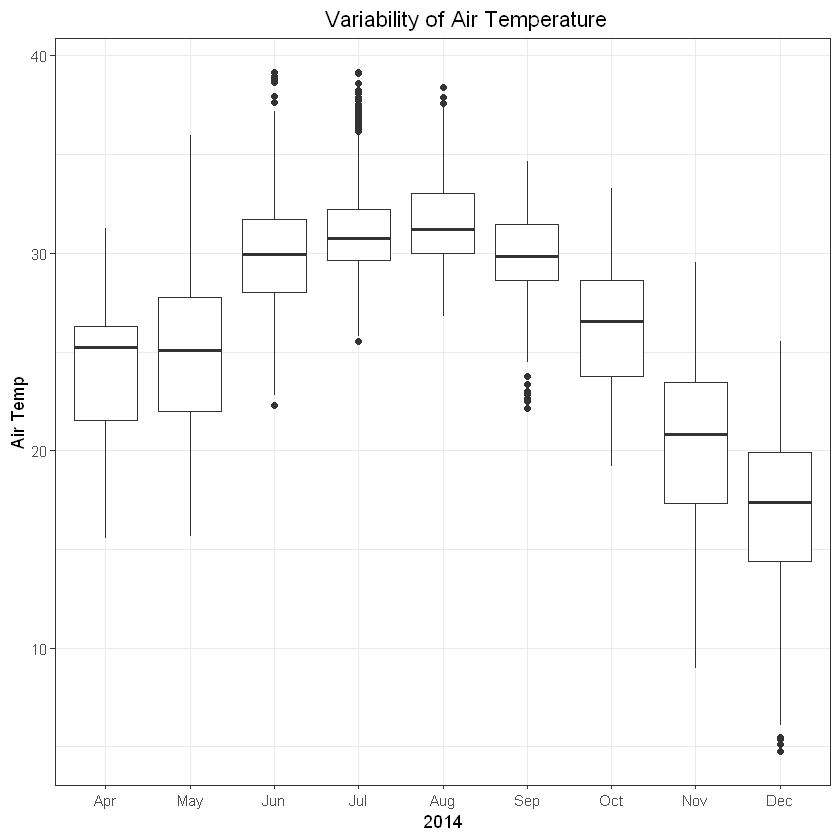

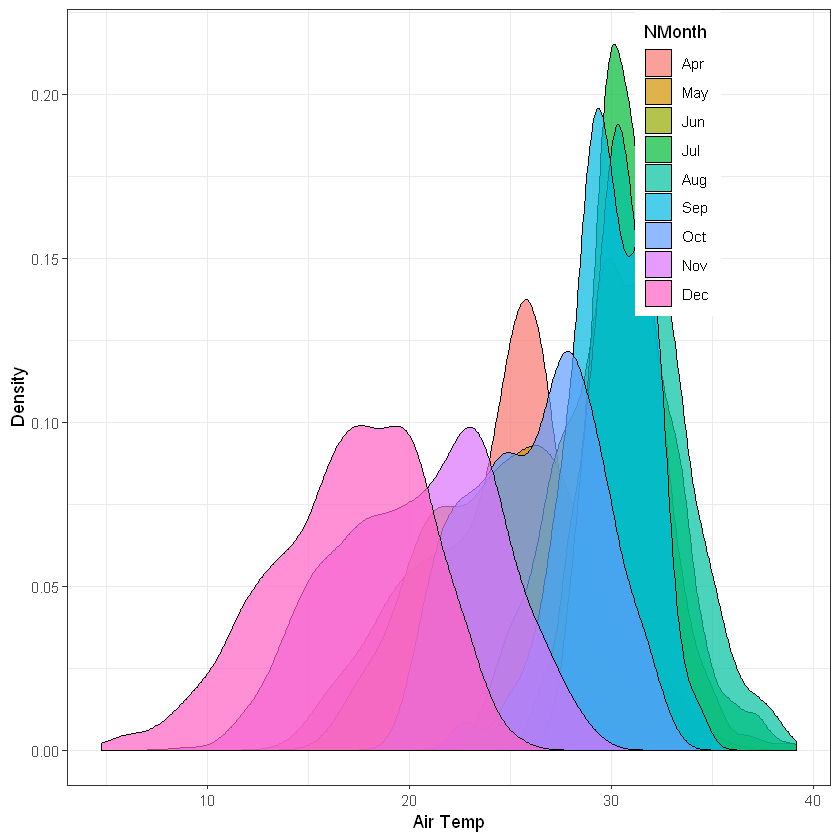

In [48]:
airTemp1 <- ggplot(df_meteo2014, aes(x = NMonth, y = AirTemp)) +
  geom_boxplot() + theme_bw()+labs(x="2014", y="Air Temp")+ ggtitle ("                                             Variability of Air Temperature")


airTemp2 <- ggplot(df_meteo2014, aes(x = AirTemp, fill = NMonth)) +
  geom_density(alpha = 0.7) + theme_bw() +
  theme(legend.position = c(0.8, 0.8))+labs(x="Air Temp", y="Density")

airTemp1
airTemp2

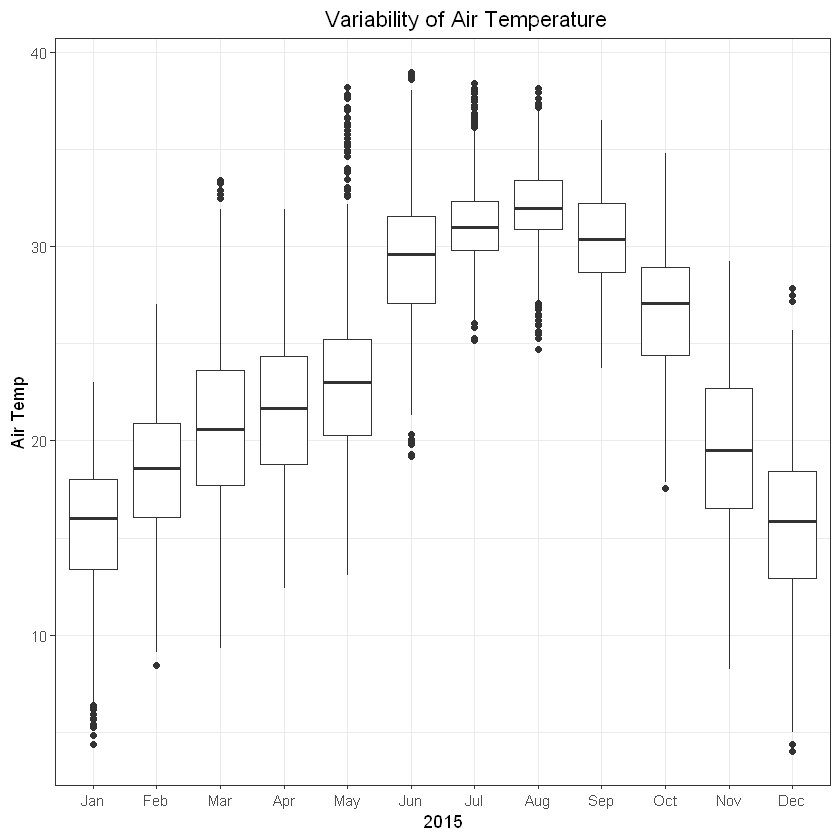

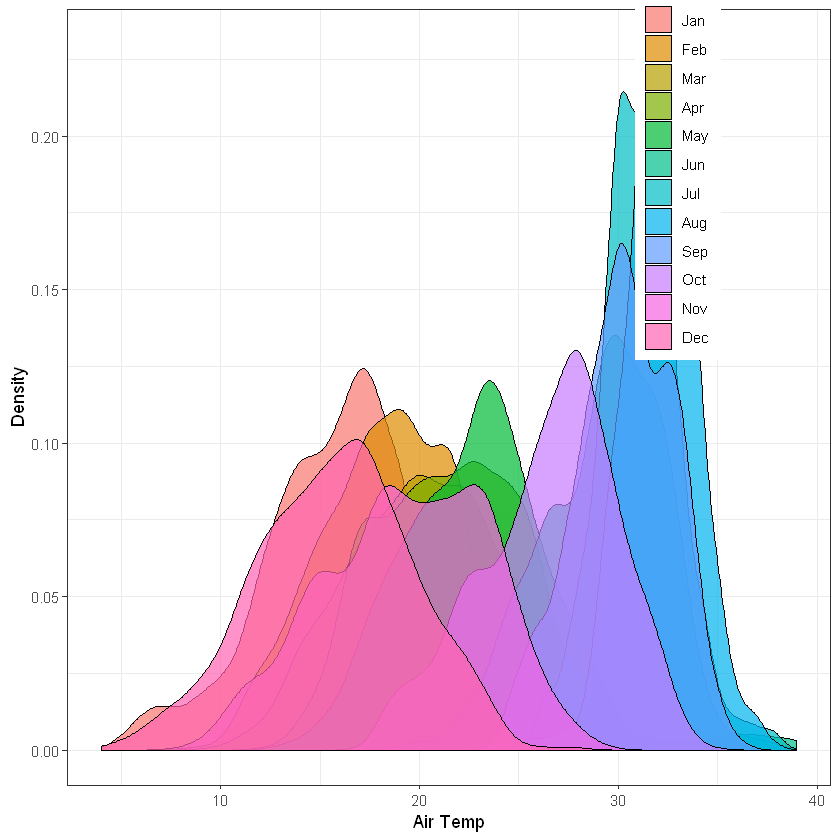

In [49]:
airTemp1 <- ggplot(df_meteo2015, aes(x = NMonth, y = AirTemp)) +
  geom_boxplot() + theme_bw()+labs(x="2015", y="Air Temp")+ ggtitle ("                                             Variability of Air Temperature")


airTemp2 <- ggplot(df_meteo2015, aes(x = AirTemp, fill = NMonth)) +
  geom_density(alpha = 0.7) + theme_bw() +
  theme(legend.position = c(0.8, 0.8))+labs(x="Air Temp", y="Density")

airTemp1
airTemp2

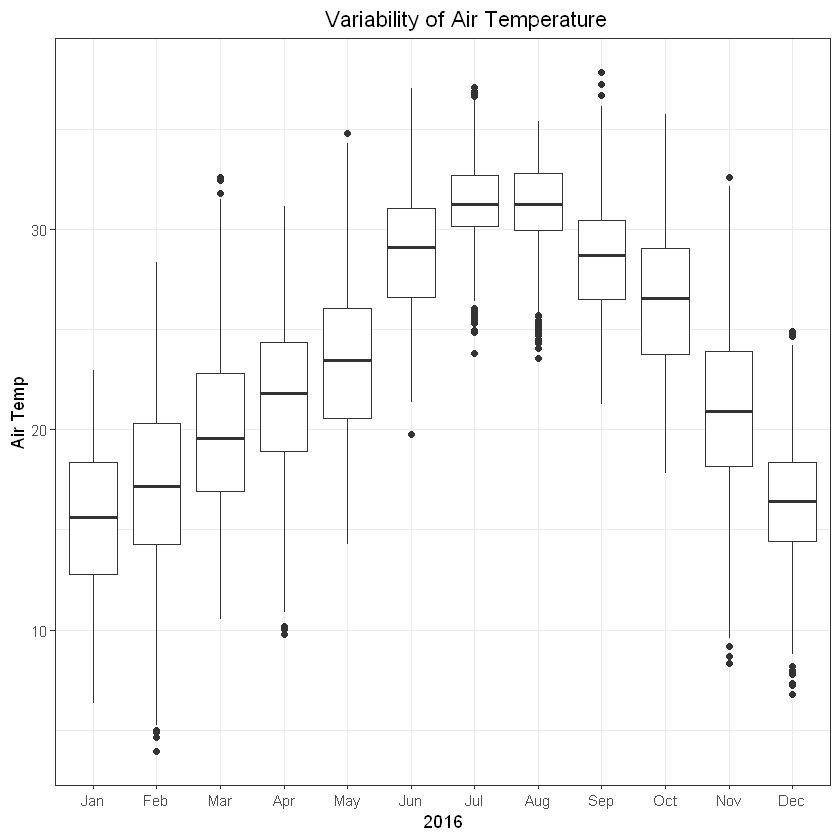

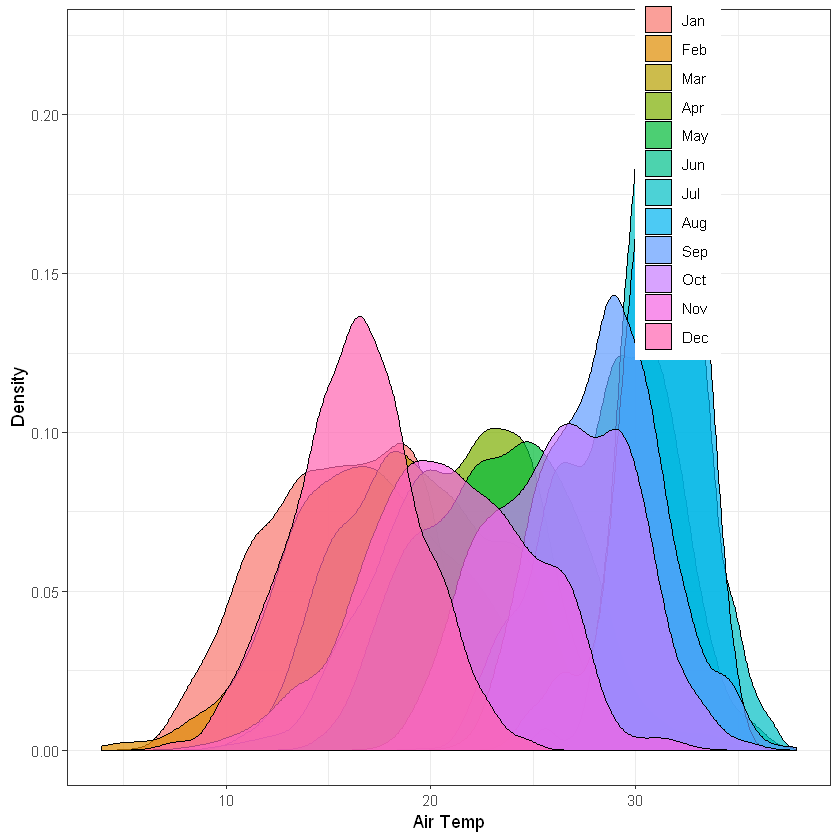

In [50]:
airTemp1 <- ggplot(df_meteo2016, aes(x = NMonth, y = AirTemp)) +
  geom_boxplot() + theme_bw()+labs(x="2016", y="Air Temp")+ ggtitle ("                                             Variability of Air Temperature")


airTemp2 <- ggplot(df_meteo2016, aes(x = AirTemp, fill = NMonth)) +
  geom_density(alpha = 0.7) + theme_bw() +
  theme(legend.position = c(0.8, 0.8))+labs(x="Air Temp", y="Density")

airTemp1
airTemp2

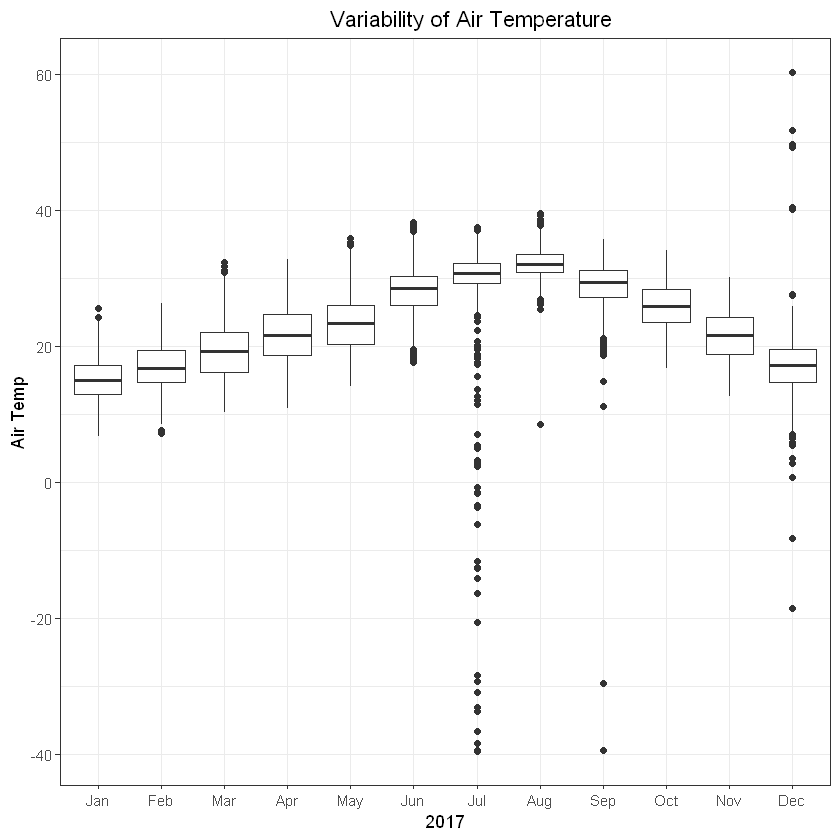

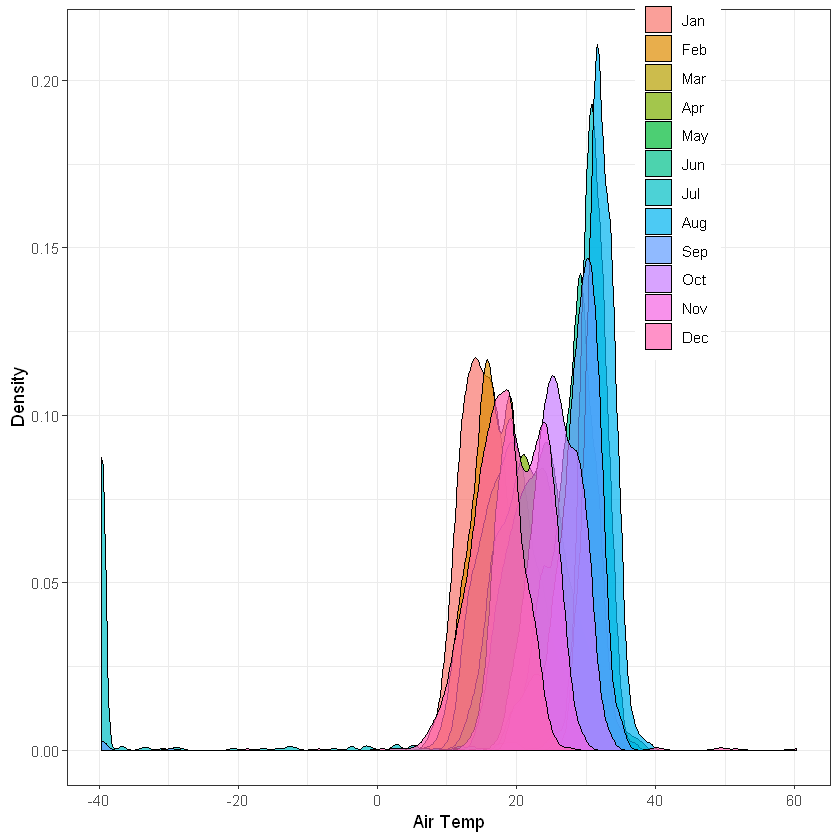

In [51]:
airTemp1 <- ggplot(df_meteo2017, aes(x = NMonth, y = AirTemp)) +
  geom_boxplot() + theme_bw()+labs(x="2017", y="Air Temp")+ ggtitle ("                                             Variability of Air Temperature")


airTemp2 <- ggplot(df_meteo2017, aes(x = AirTemp, fill = NMonth)) +
  geom_density(alpha = 0.7) + theme_bw() +
  theme(legend.position = c(0.8, 0.8))+labs(x="Air Temp", y="Density")

airTemp1
airTemp2

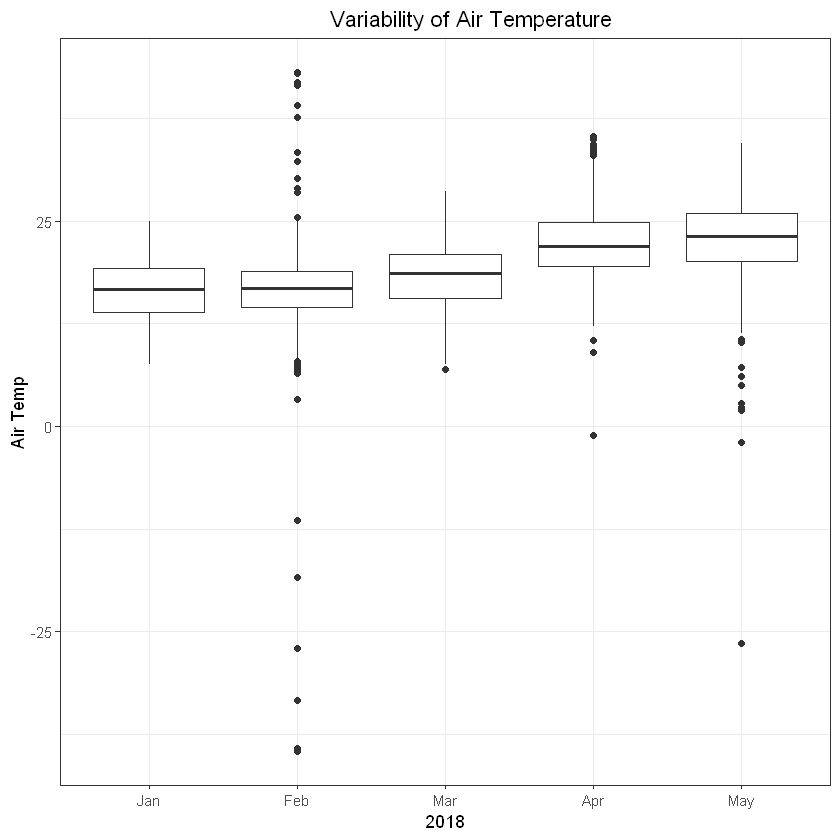

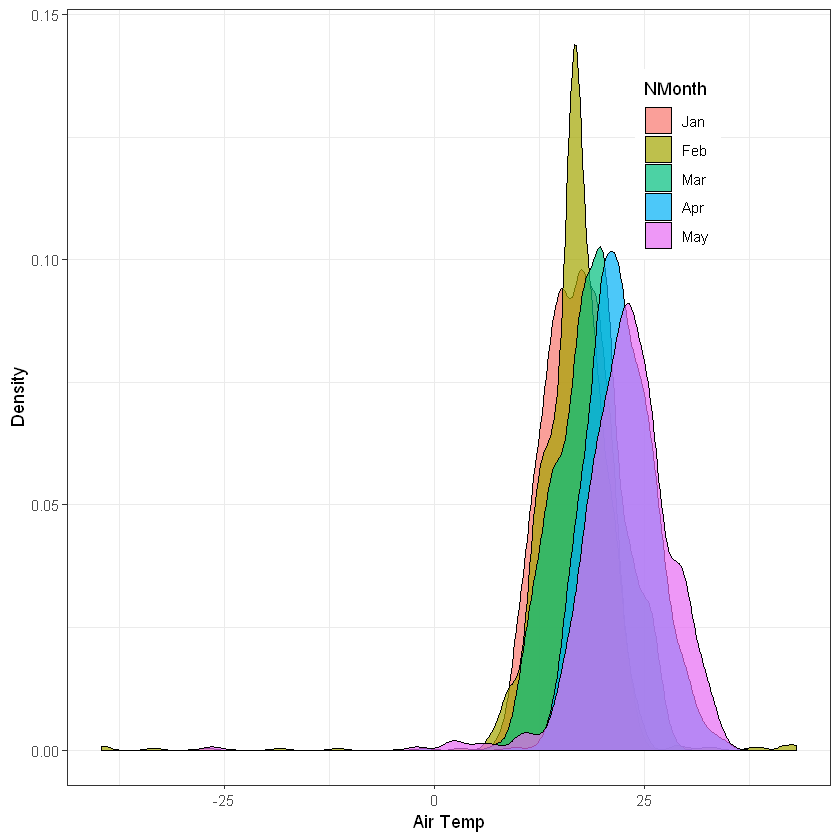

In [52]:
airTemp1 <- ggplot(df_meteo2018, aes(x = NMonth, y = AirTemp)) +
  geom_boxplot() + theme_bw() +labs(x="2018", y="Air Temp")+ ggtitle ("                                             Variability of Air Temperature")


airTemp2 <- ggplot(df_meteo2018, aes(x = AirTemp, fill = NMonth)) +
  geom_density(alpha = 0.7) + theme_bw() +
  theme(legend.position = c(0.8, 0.8))+labs(x="Air Temp", y="Density")

airTemp1
airTemp2

Warning message:
"Removed 73 rows containing non-finite values (stat_boxplot)."

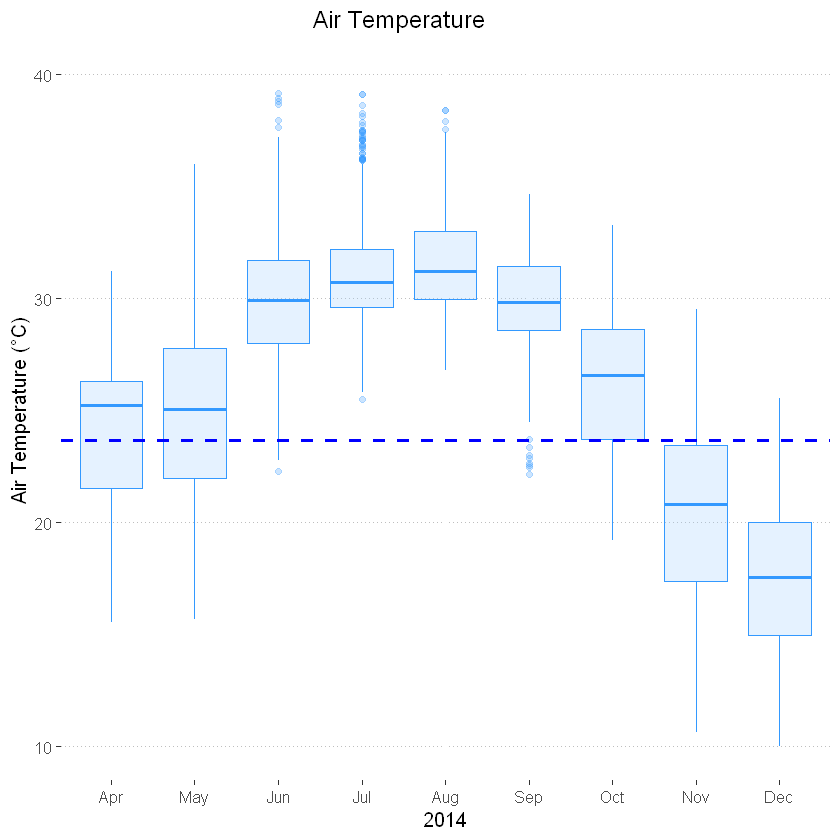

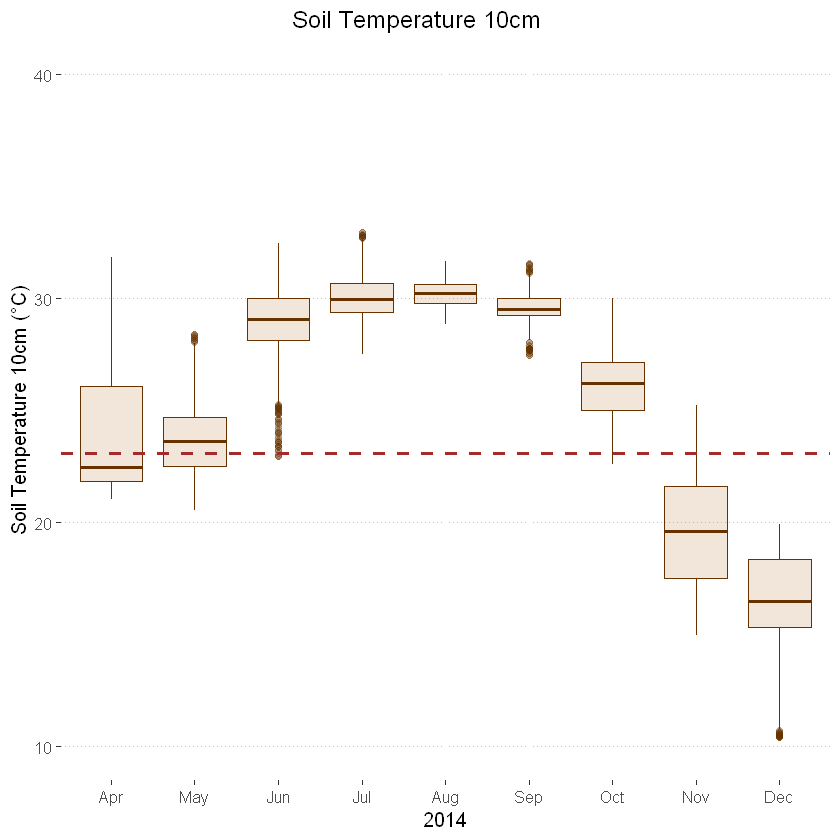

Warning message:
"Removed 2505 rows containing non-finite values (stat_boxplot)."

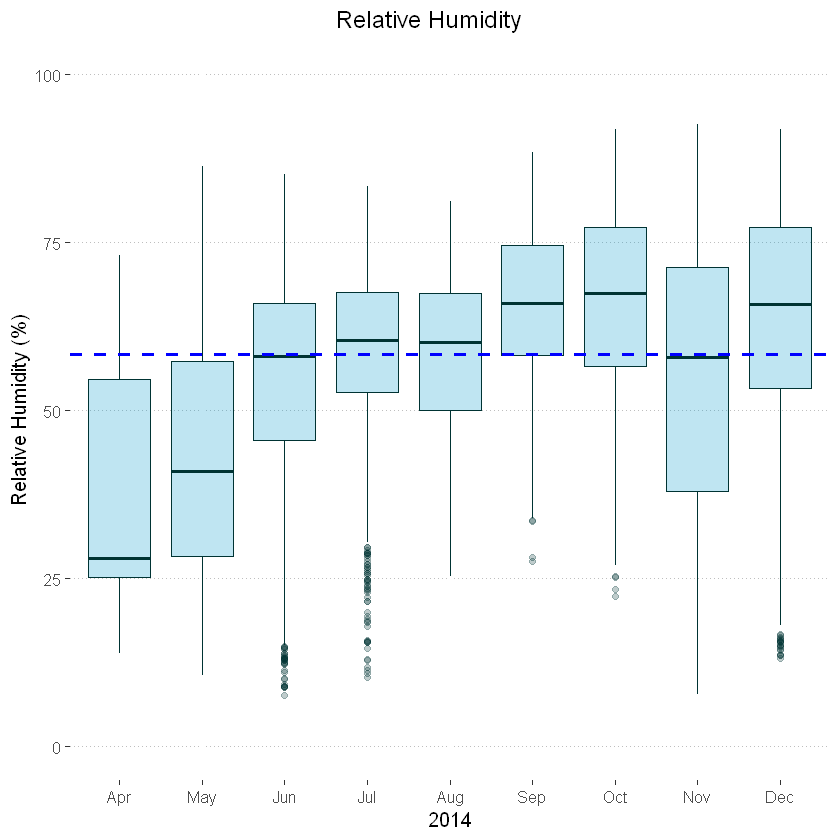

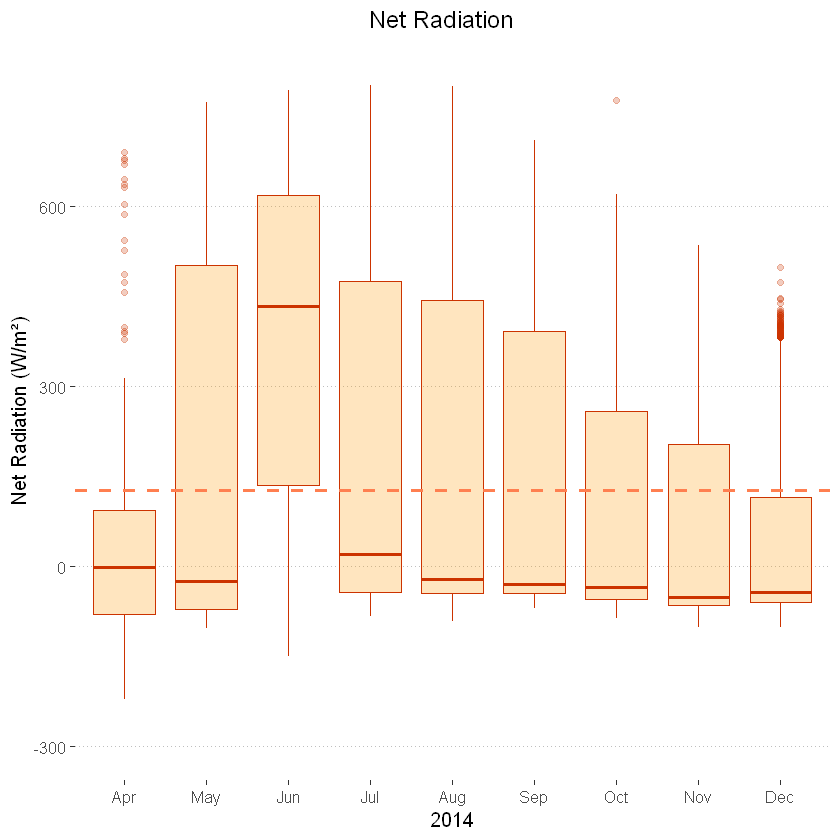

In [55]:
fill <- "#99CCFF"
line <- "#3399FF"
airT <- ggplot(df_meteo2014, aes(x = NMonth, y = AirTemp)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
        # scale_x_discrete(name = "Month") +
        ggtitle("                                    Air Temperature") +
        geom_hline(yintercept=23.661, linetype="dashed", color = "blue", size=1.0) +
        ylim(10, 40) + theme_pubclean() +
        labs(x="2014", y="Air Temperature (°C)") 
       # geom_text(x=8, y=20, label="Ave Temp = 23.661", aes(fontface=1)) 

fill <- "#CC9966"
line <- "#663300"
soilT <- ggplot(df_meteo2014, aes(x = NMonth, y = SoilT10)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
       # scale_x_discrete(name = "Month") +
       ggtitle("                                 Soil Temperature 10cm") +
        geom_hline(yintercept=23.09, linetype="dashed", color = "brown", size=1.0) +
        ylim(10, 40) + theme_pubclean() +
        labs(x="2014", y="Soil Temperature 10cm (°C)")

fill <- "#0099CC"
line <- "#003333"
relH <- ggplot(df_meteo2014, aes(x = NMonth, y = RH)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
       # scale_x_discrete(name = "Month") +
        ggtitle("                                      Relative Humidity") +
        geom_hline(yintercept=58.36, linetype="dashed", color = "blue", size=1.0) +
        ylim(0, 100) + theme_pubclean() +
        labs(x="2014", y="Relative Humidity (%)")

fill <- "#FF9900"
line <- "#CC3300"
netRad <- ggplot(df_meteo2014, aes(x = NMonth, y = NetRad)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
       # scale_x_discrete(name = "Month") +
         ggtitle("                                          Net Radiation") +
        geom_hline(yintercept=126.56, linetype="dashed", color = "coral", size=1.0) +
        ylim(-300, 820) + theme_pubclean() +
        labs(x="2014", y="Net Radiation (W/m²)")

airT
soilT
relH
netRad

#plot_grid(airT, soilT, labels = "AUTO")

Warning message:
"Removed 238 rows containing non-finite values (stat_boxplot)."

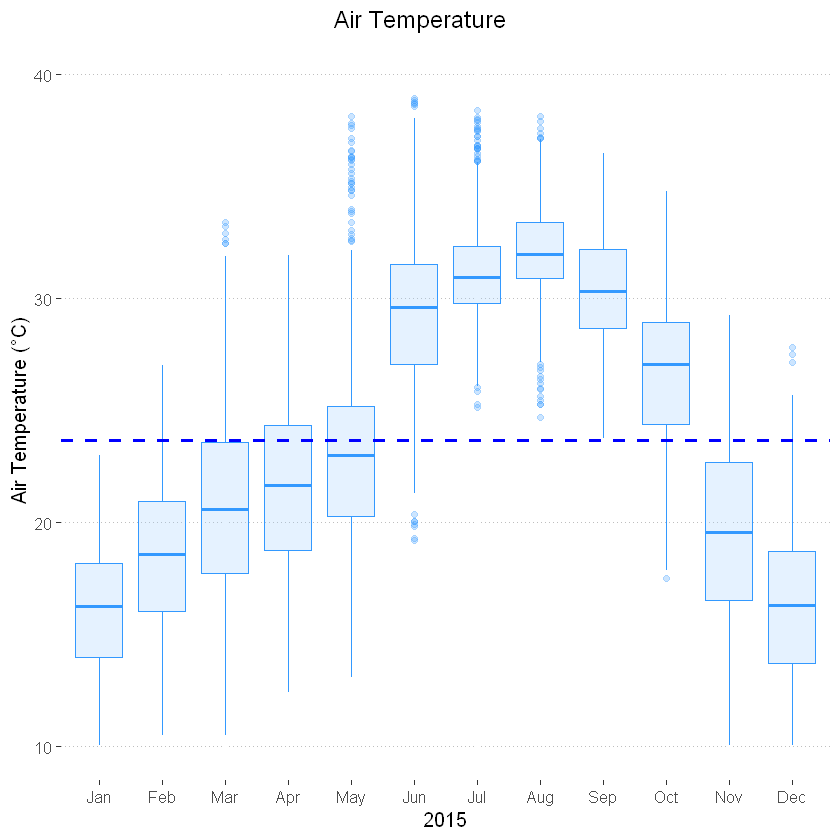

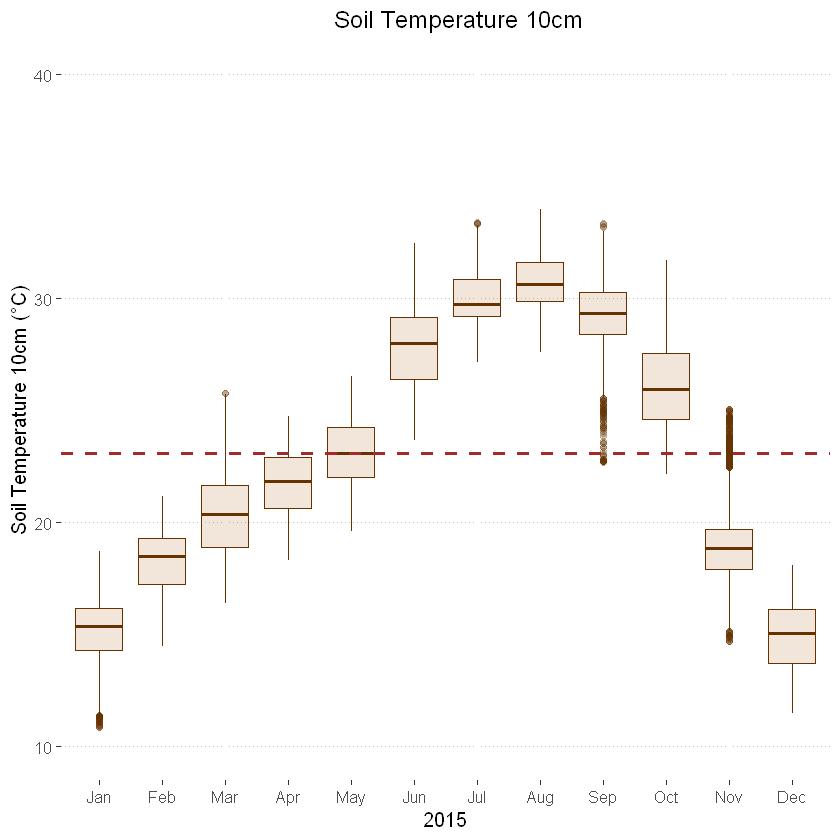

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."

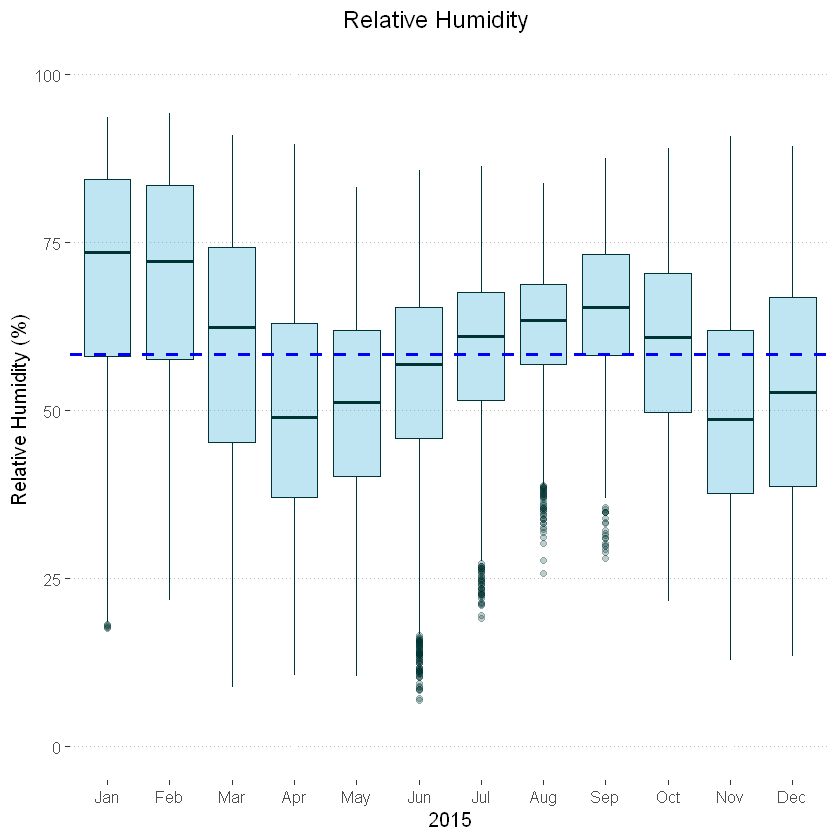

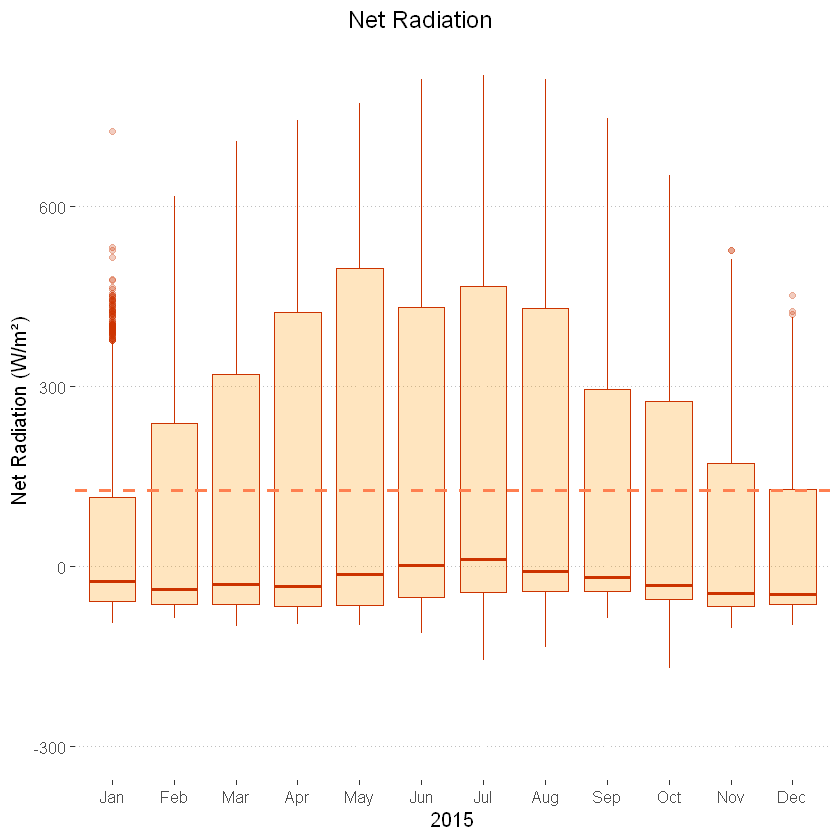

In [56]:
fill <- "#99CCFF"
line <- "#3399FF"
airT <- ggplot(df_meteo2015, aes(x = NMonth, y = AirTemp)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
        # scale_x_discrete(name = "Month") +
        ggtitle("                                       Air Temperature") +
        geom_hline(yintercept=23.661, linetype="dashed", color = "blue", size=1.0) +
        ylim(10, 40) + theme_pubclean() +
        labs(x="2015", y="Air Temperature (°C)") 
       # geom_text(x=8, y=20, label="Ave Temp = 23.661", aes(fontface=1)) 

fill <- "#CC9966"
line <- "#663300"
soilT <- ggplot(df_meteo2015, aes(x = NMonth, y = SoilT10)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
       # scale_x_discrete(name = "Month") +
       ggtitle("                                       Soil Temperature 10cm") +
        geom_hline(yintercept=23.09, linetype="dashed", color = "brown", size=1.0) +
        ylim(10, 40) + theme_pubclean() +
        labs(x="2015", y="Soil Temperature 10cm (°C)")

fill <- "#0099CC"
line <- "#003333"
relH <- ggplot(df_meteo2015, aes(x = NMonth, y = RH)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
       # scale_x_discrete(name = "Month") +
        ggtitle("                                       Relative Humidity") +
        geom_hline(yintercept=58.36, linetype="dashed", color = "blue", size=1.0) +
        ylim(0, 100) + theme_pubclean() +
        labs(x="2015", y="Relative Humidity (%)")

fill <- "#FF9900"
line <- "#CC3300"
netRad <- ggplot(df_meteo2015, aes(x = NMonth, y = NetRad)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
       # scale_x_discrete(name = "Month") +
         ggtitle("                                       Net Radiation") +
        geom_hline(yintercept=126.56, linetype="dashed", color = "coral", size=1.0) +
        ylim(-300, 820) + theme_pubclean() +
        labs(x="2015", y="Net Radiation (W/m²)")

airT
soilT
relH
netRad

#plot_grid(airT, soilT, labels = "AUTO")

Warning message:
"Removed 194 rows containing non-finite values (stat_boxplot)."

Warning message:
"Removed 18 rows containing non-finite values (stat_boxplot)."

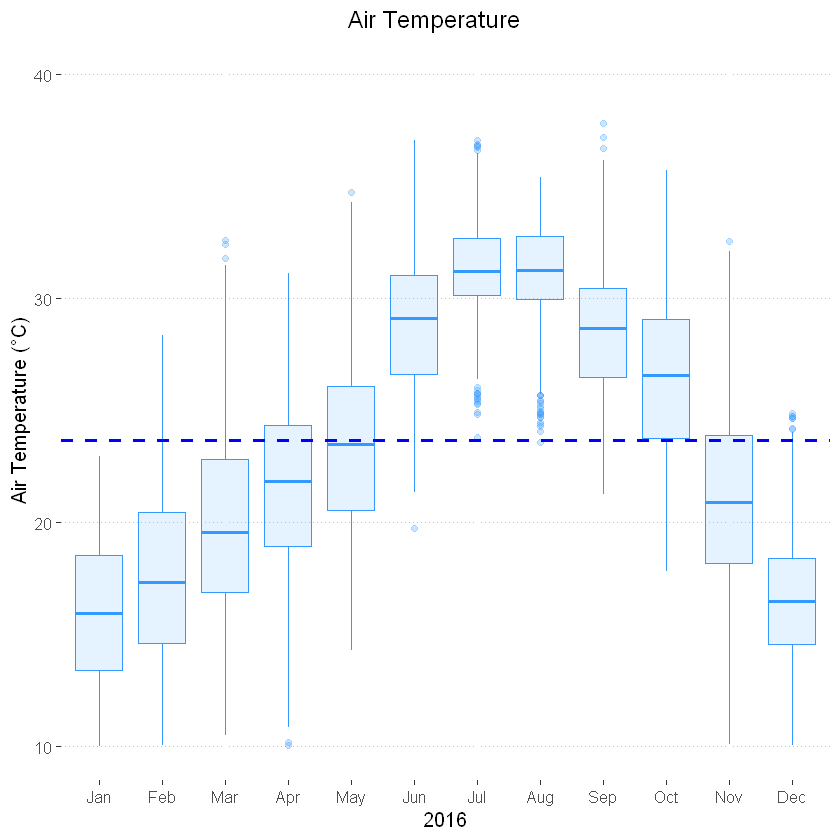

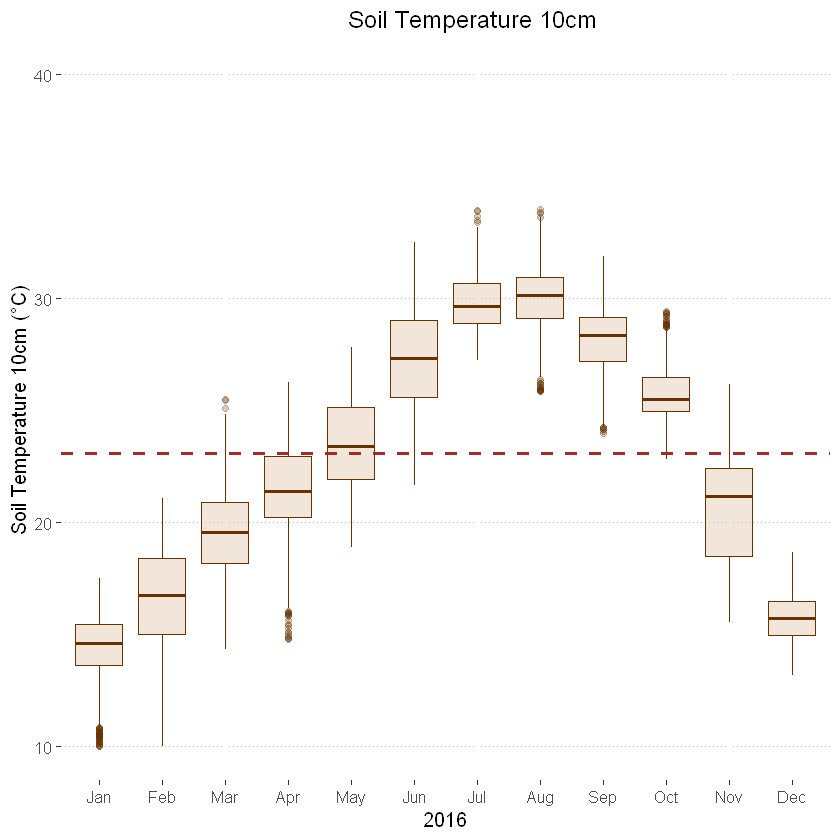

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."

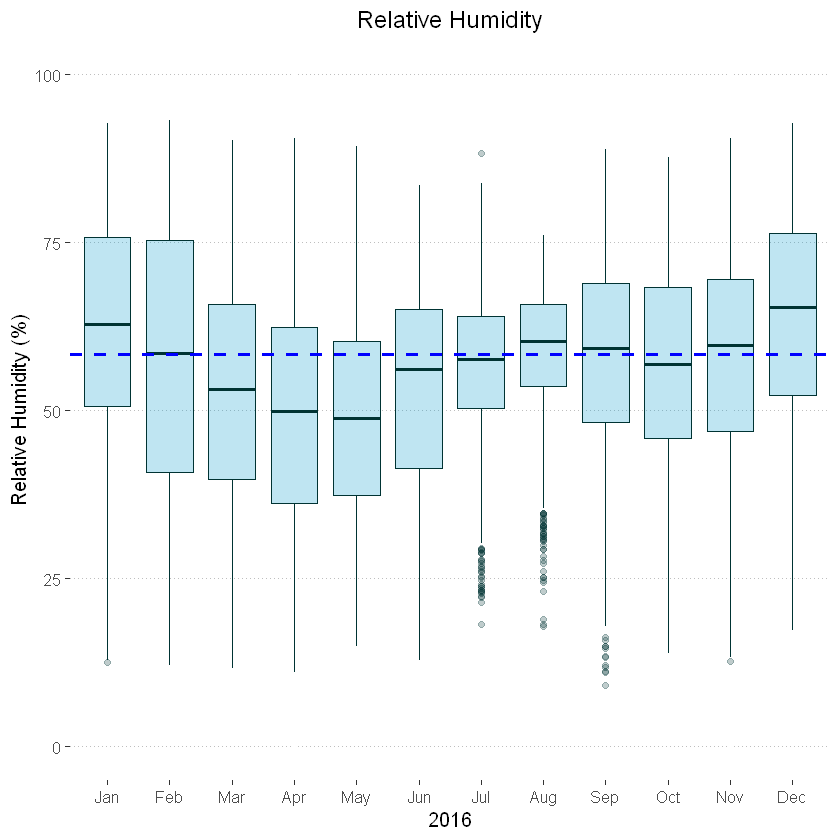

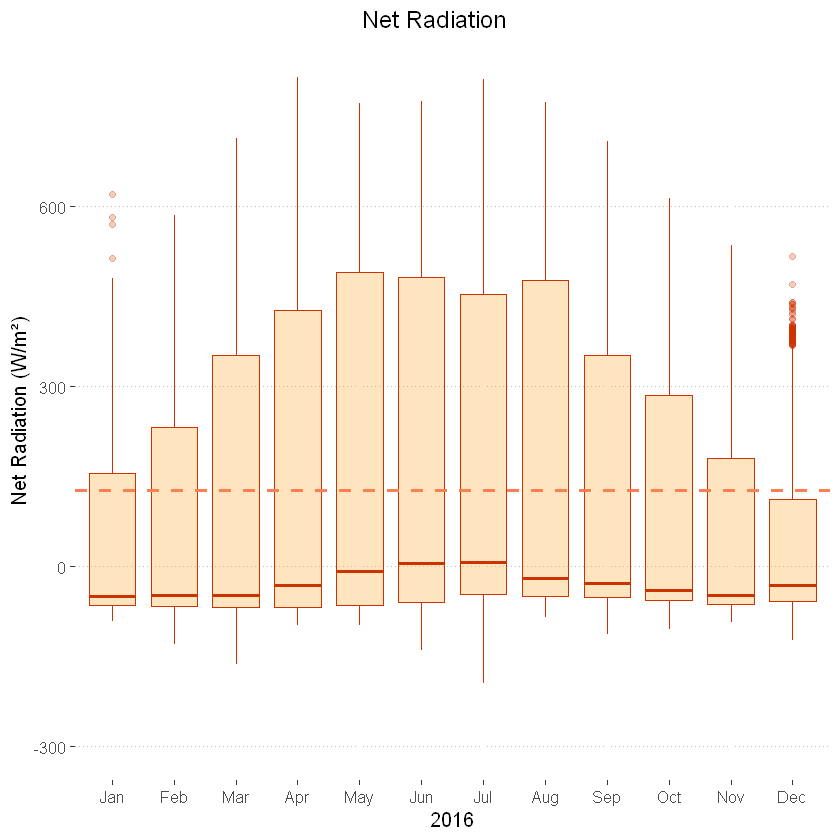

In [57]:
fill <- "#99CCFF"
line <- "#3399FF"
airT <- ggplot(df_meteo2016, aes(x = NMonth, y = AirTemp)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
        # scale_x_discrete(name = "Month") +
        ggtitle("                                         Air Temperature") +
        geom_hline(yintercept=23.661, linetype="dashed", color = "blue", size=1.0) +
        ylim(10, 40) + theme_pubclean() +
        labs(x="2016", y="Air Temperature (°C)") 
       # geom_text(x=8, y=20, label="Ave Temp = 23.661", aes(fontface=1)) 

fill <- "#CC9966"
line <- "#663300"
soilT <- ggplot(df_meteo2016, aes(x = NMonth, y = SoilT10)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
       # scale_x_discrete(name = "Month") +
       ggtitle("                                         Soil Temperature 10cm") +
        geom_hline(yintercept=23.09, linetype="dashed", color = "brown", size=1.0) +
        ylim(10, 40) + theme_pubclean() +
        labs(x="2016", y="Soil Temperature 10cm (°C)")

fill <- "#0099CC"
line <- "#003333"
relH <- ggplot(df_meteo2016, aes(x = NMonth, y = RH)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
       # scale_x_discrete(name = "Month") +
       ggtitle("                                         Relative Humidity") +
        geom_hline(yintercept=58.36, linetype="dashed", color = "blue", size=1.0) +
        ylim(0, 100) + theme_pubclean() +
        labs(x="2016", y="Relative Humidity (%)")

fill <- "#FF9900"
line <- "#CC3300"
netRad <- ggplot(df_meteo2016, aes(x = NMonth, y = NetRad)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
       # scale_x_discrete(name = "Month") +
         ggtitle("                                         Net Radiation") +
        geom_hline(yintercept=126.56, linetype="dashed", color = "coral", size=1.0) +
        ylim(-300, 820) + theme_pubclean() +
        labs(x="2016", y="Net Radiation (W/m²)")

airT
soilT
relH
netRad

#plot_grid(airT, soilT, labels = "AUTO")

Warning message:
"Removed 329 rows containing non-finite values (stat_boxplot)."

Warning message:
"Removed 62 rows containing non-finite values (stat_boxplot)."

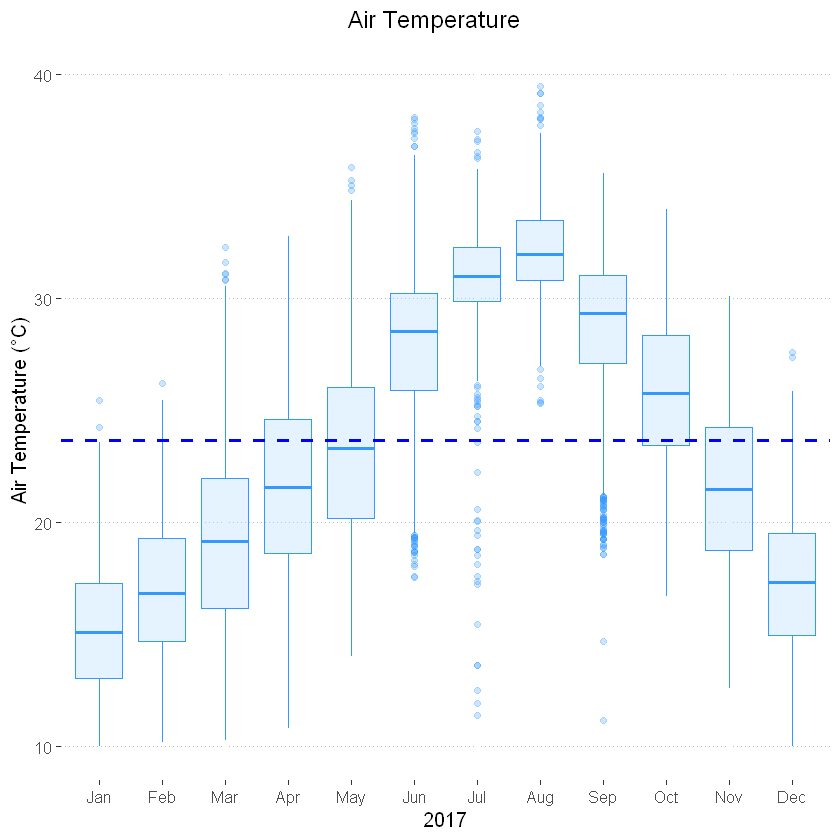

Warning message:
"Removed 7 rows containing non-finite values (stat_boxplot)."

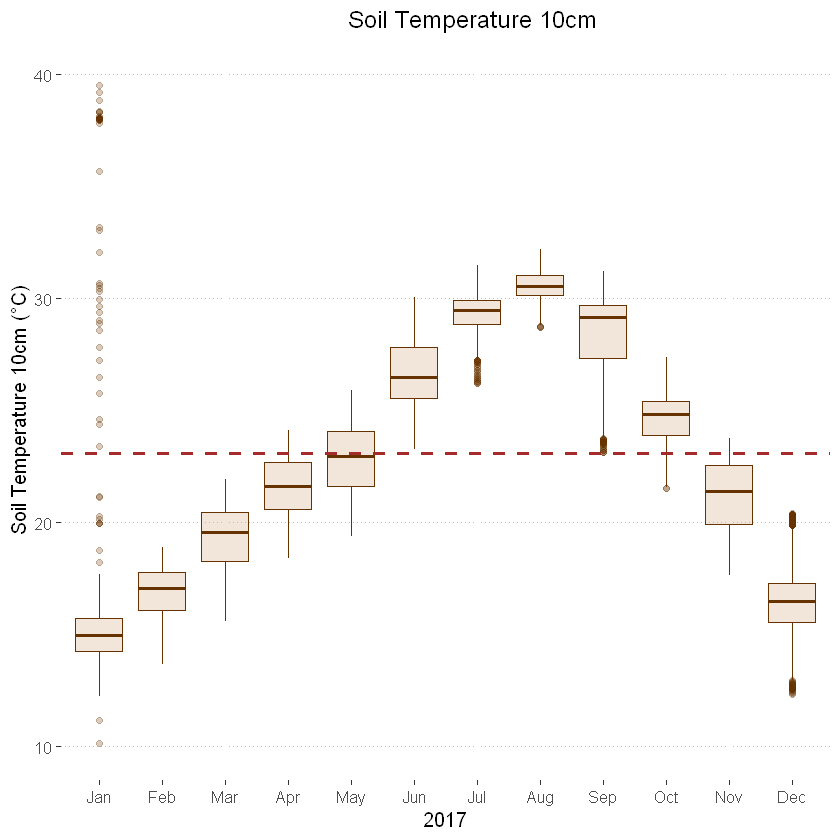

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."

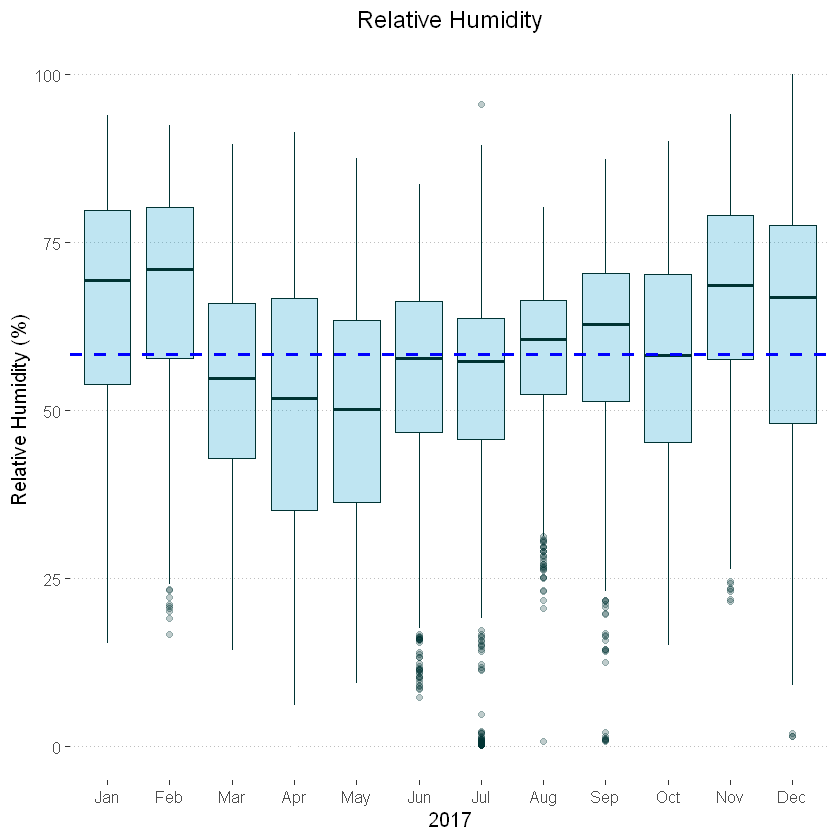

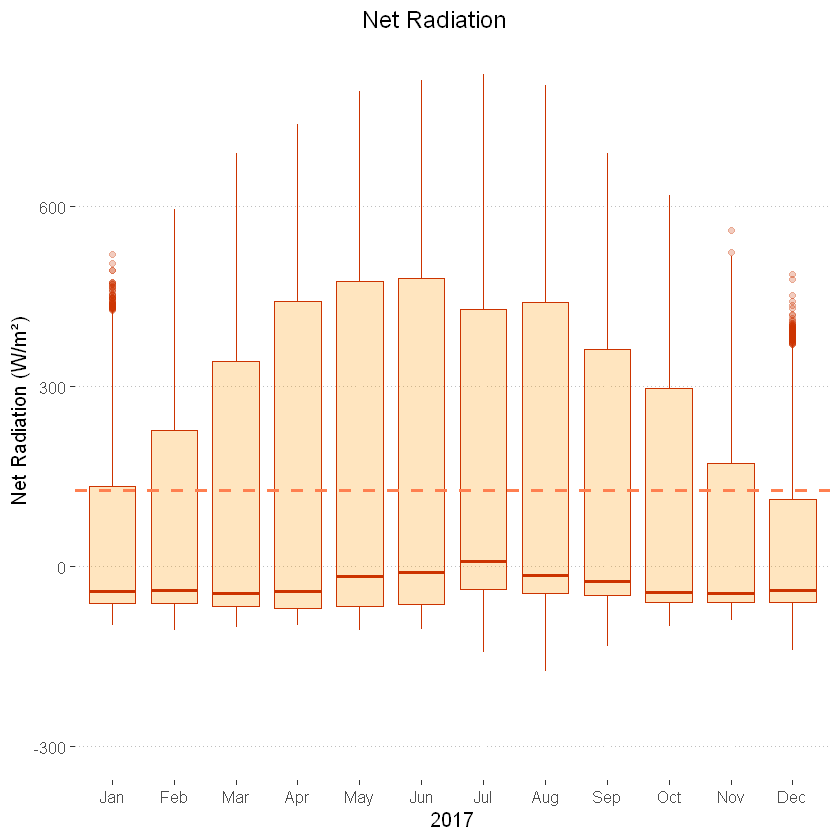

In [58]:
fill <- "#99CCFF"
line <- "#3399FF"
airT <- ggplot(df_meteo2017, aes(x = NMonth, y = AirTemp)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
        # scale_x_discrete(name = "Month") +
        ggtitle("                                         Air Temperature") +
        geom_hline(yintercept=23.661, linetype="dashed", color = "blue", size=1.0) +
        ylim(10, 40) + theme_pubclean() +
        labs(x="2017", y="Air Temperature (°C)") 
       # geom_text(x=8, y=20, label="Ave Temp = 23.661", aes(fontface=1)) 

fill <- "#CC9966"
line <- "#663300"
soilT <- ggplot(df_meteo2017, aes(x = NMonth, y = SoilT10)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
       # scale_x_discrete(name = "Month") +
       ggtitle("                                         Soil Temperature 10cm") +
        geom_hline(yintercept=23.09, linetype="dashed", color = "brown", size=1.0) +
        ylim(10, 40) + theme_pubclean() +
        labs(x="2017", y="Soil Temperature 10cm (°C)")

fill <- "#0099CC"
line <- "#003333"
relH <- ggplot(df_meteo2017, aes(x = NMonth, y = RH)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
       # scale_x_discrete(name = "Month") +
        ggtitle("                                         Relative Humidity") +
        geom_hline(yintercept=58.36, linetype="dashed", color = "blue", size=1.0) +
        ylim(0, 100) + theme_pubclean() +
        labs(x="2017", y="Relative Humidity (%)")

fill <- "#FF9900"
line <- "#CC3300"
netRad <- ggplot(df_meteo2017, aes(x = NMonth, y = NetRad)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
       # scale_x_discrete(name = "Month") +
         ggtitle("                                         Net Radiation") +
        geom_hline(yintercept=126.56, linetype="dashed", color = "coral", size=1.0) +
        ylim(-300, 820) + theme_pubclean() +
        labs(x="2017", y="Net Radiation (W/m²)")

airT
soilT
relH
netRad

#plot_grid(airT, soilT, labels = "AUTO")

Warning message:
"Removed 125 rows containing non-finite values (stat_boxplot)."

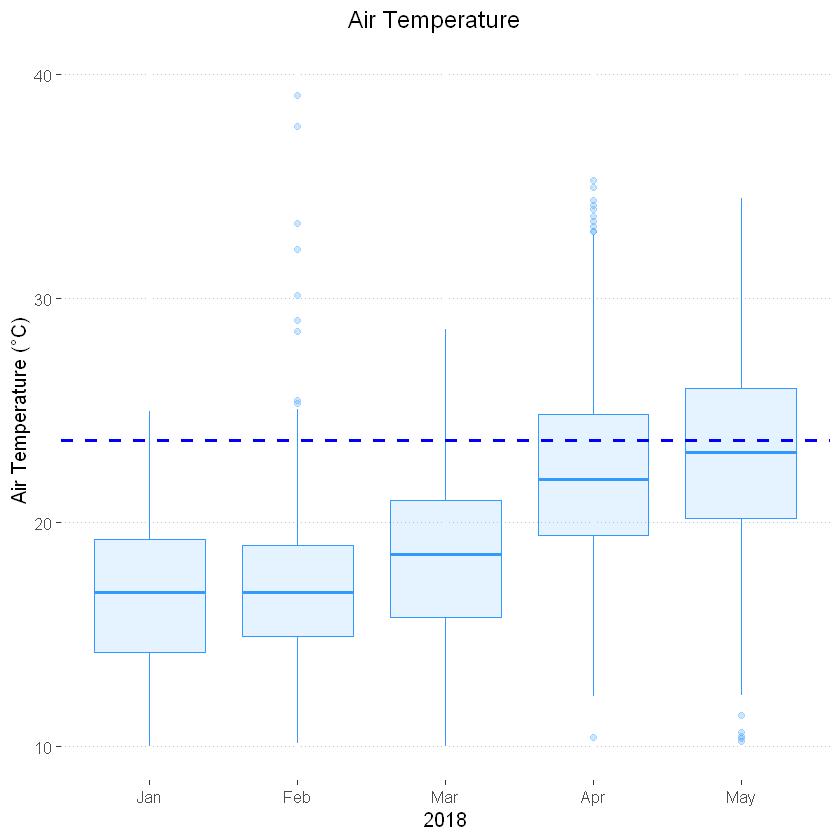

Warning message:
"Removed 6 rows containing non-finite values (stat_boxplot)."

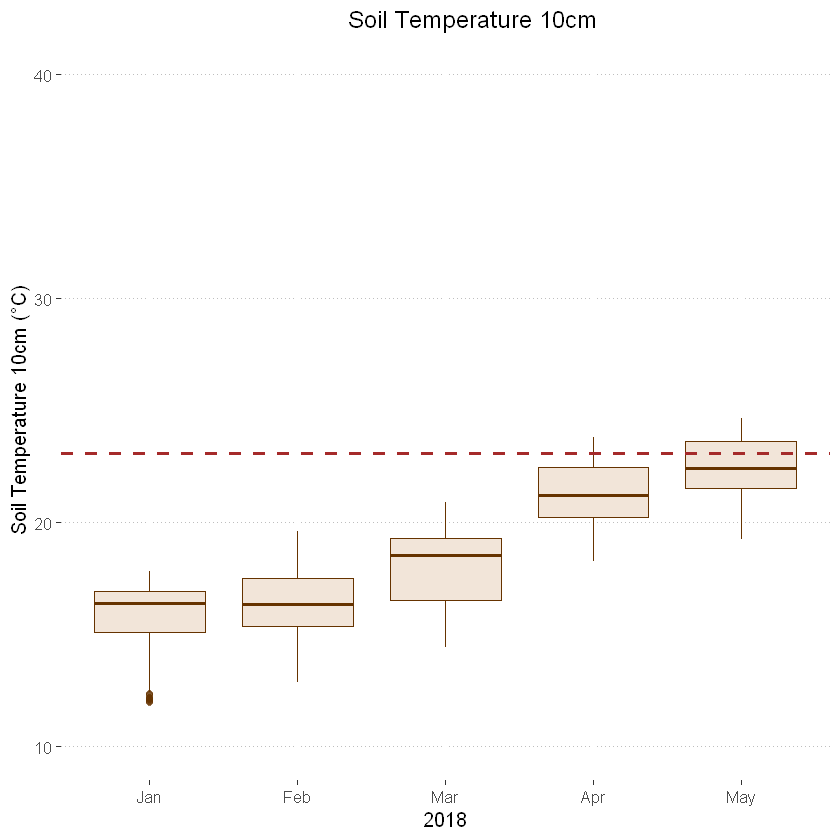

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."

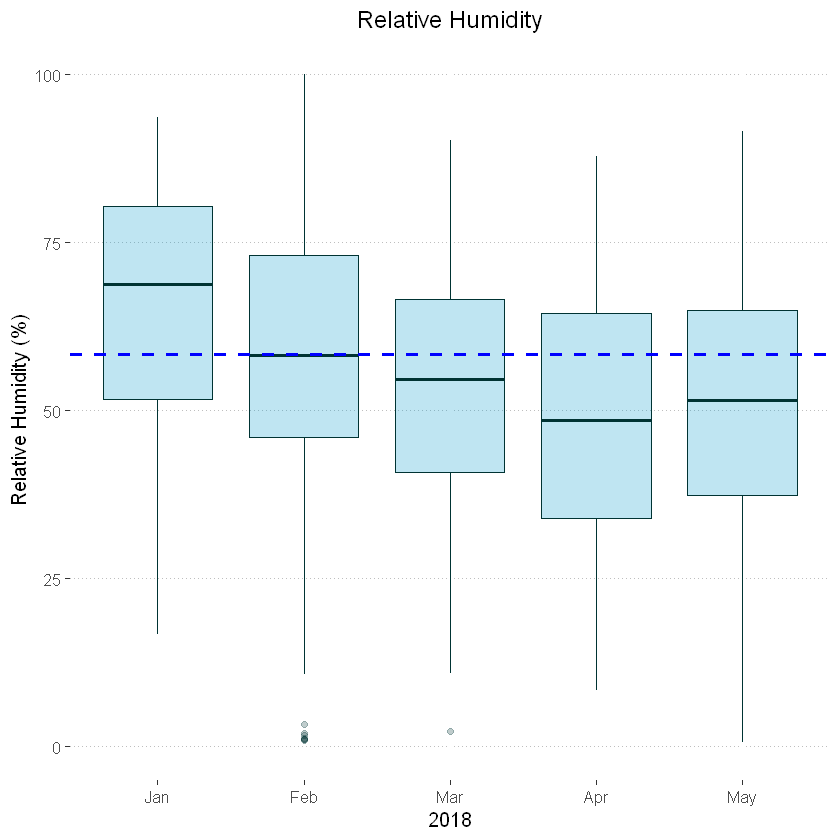

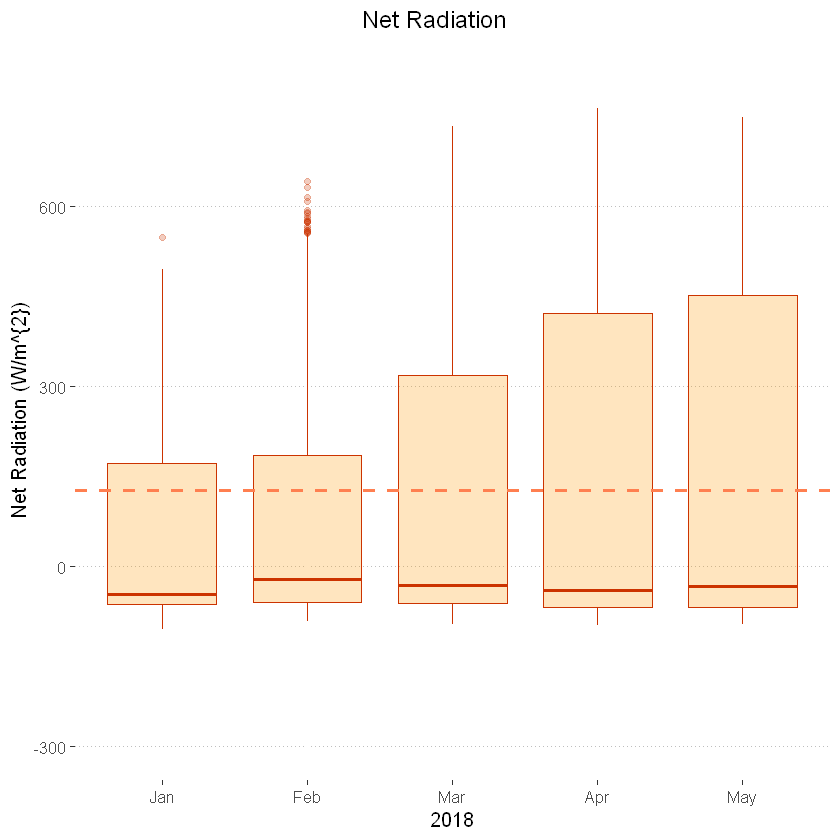

In [59]:
fill <- "#99CCFF"
line <- "#3399FF"
airT <- ggplot(df_meteo2018, aes(x = NMonth, y = AirTemp)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
        # scale_x_discrete(name = "Month") +
        ggtitle("                                         Air Temperature") +
        geom_hline(yintercept=23.661, linetype="dashed", color = "blue", size=1.0) +
        ylim(10, 40) + theme_pubclean() +
        labs(x="2018", y="Air Temperature (°C)") 
       # geom_text(x=8, y=20, label="Ave Temp = 23.661", aes(fontface=1)) 

fill <- "#CC9966"
line <- "#663300"
soilT <- ggplot(df_meteo2018, aes(x = NMonth, y = SoilT10)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
       # scale_x_discrete(name = "Month") +
       ggtitle("                                         Soil Temperature 10cm") +
        geom_hline(yintercept=23.09, linetype="dashed", color = "brown", size=1.0) +
        ylim(10, 40) + theme_pubclean() +
        labs(x="2018", y="Soil Temperature 10cm (°C)")

fill <- "#0099CC"
line <- "#003333"
relH <- ggplot(df_meteo2018, aes(x = NMonth, y = RH)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
       # scale_x_discrete(name = "Month") +
        ggtitle("                                         Relative Humidity") +
        geom_hline(yintercept=58.36, linetype="dashed", color = "blue", size=1.0) +
        ylim(0, 100) + theme_pubclean() +
        labs(x="2018", y="Relative Humidity (%)")

fill <- "#FF9900"
line <- "#CC3300"
netRad <- ggplot(df_meteo2018, aes(x = NMonth, y = NetRad)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
       # scale_x_discrete(name = "Month") +
         ggtitle("                                         Net Radiation") +
        geom_hline(yintercept=126.56, linetype="dashed", color = "coral", size=1.0) +
        ylim(-300, 820) + theme_pubclean() +
        labs(x="2018", y="Net Radiation (W/m^{2})")

airT
soilT
relH
netRad

#plot_grid(airT, soilT, labels = "AUTO")

In [61]:
MoP4<- aggregate(df_meteo2014[c("Precip")], 
                         by = df_meteo2014[c("NMonth")],
                         FUN=sum, na.rm=TRUE)
MoP5<- aggregate(df_meteo2015[c("Precip")], 
                         by = df_meteo2015[c("NMonth")],
                         FUN=sum, na.rm=TRUE)
MoP6<- aggregate(df_meteo2016[c("Precip")], 
                         by = df_meteo2016[c("NMonth")],
                         FUN=sum, na.rm=TRUE)
MoP7<- aggregate(df_meteo2017[c("Precip")], 
                         by = df_meteo2017[c("NMonth")],
                         FUN=sum, na.rm=TRUE)
MoP8<- aggregate(df_meteo2018[c("Precip")], 
                         by = df_meteo2018[c("NMonth")],
                         FUN=sum, na.rm=TRUE)

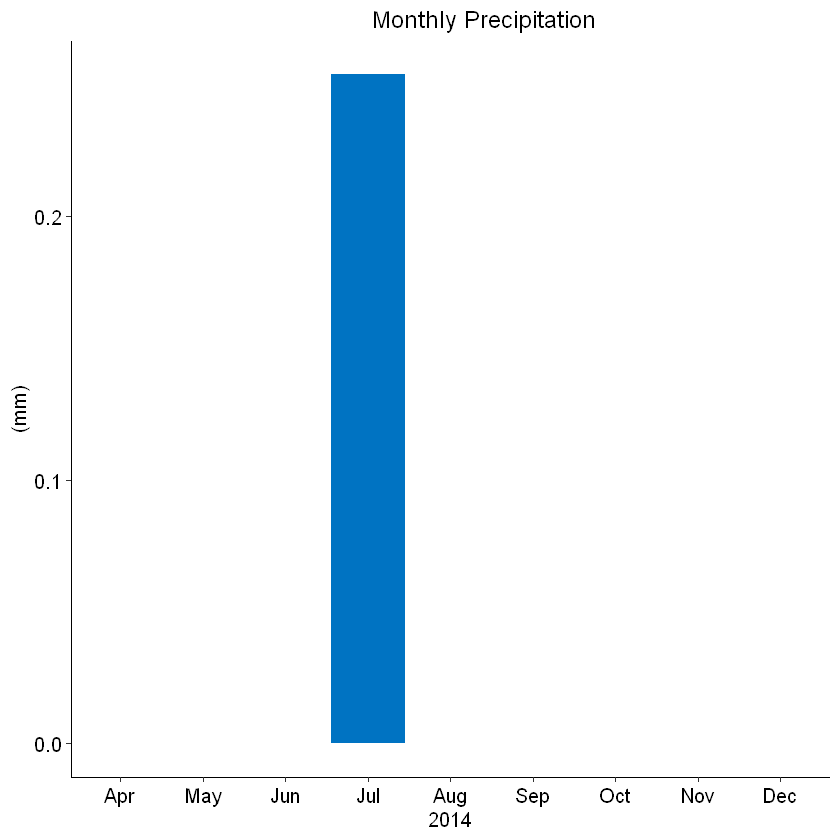

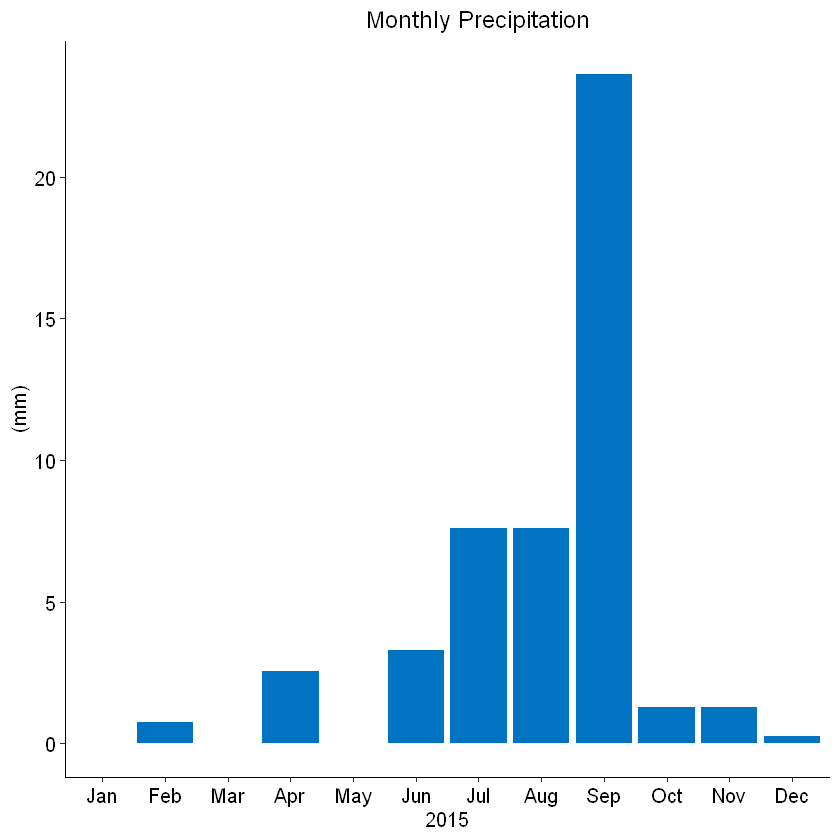

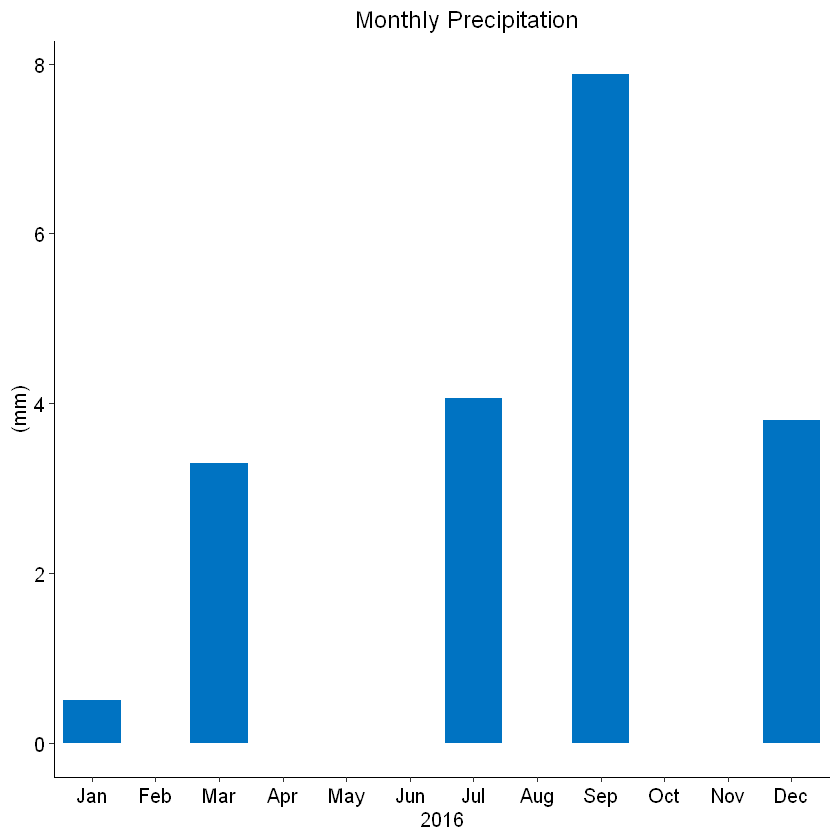

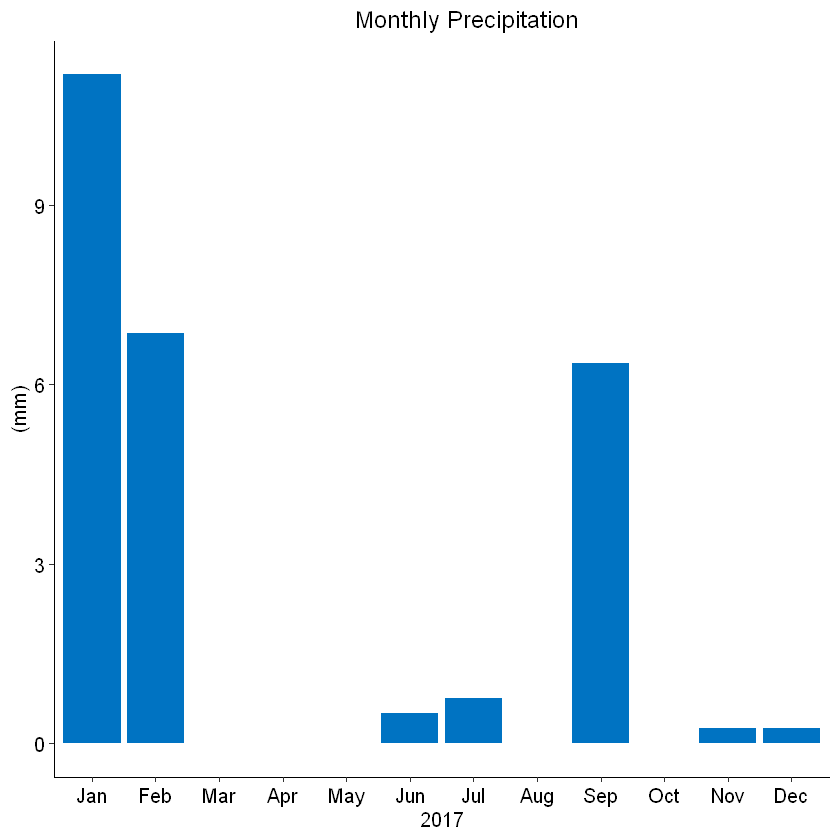

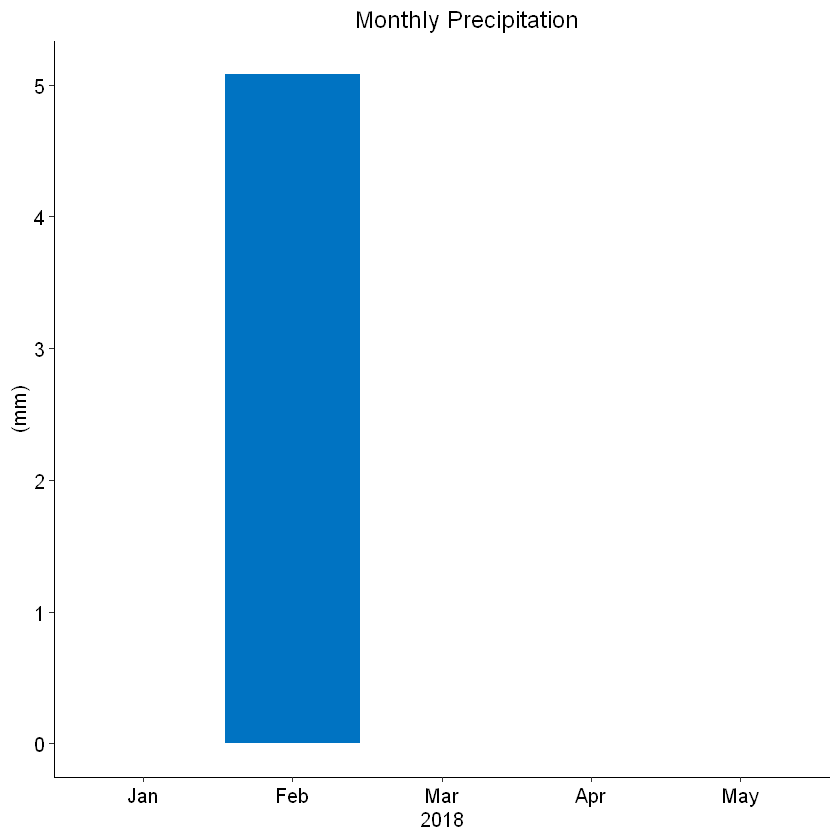

In [62]:
ggplot(MoP4, aes(x = NMonth, y = Precip)) +
  geom_bar(fill = "#0073C2FF", stat = "identity") +
 labs(title="                                           Monthly Precipitation") +
  labs(x="2014", y="(mm)")
ggplot(MoP5, aes(x = NMonth, y = Precip)) +
  geom_bar(fill = "#0073C2FF", stat = "identity") +
 labs(title="                                           Monthly Precipitation") +
  labs(x="2015", y="(mm)")
ggplot(MoP6, aes(x = NMonth, y = Precip)) +
  geom_bar(fill = "#0073C2FF", stat = "identity") +
 labs(title="                                           Monthly Precipitation") +
  labs(x="2016", y="(mm)")
ggplot(MoP7, aes(x = NMonth, y = Precip)) +
  geom_bar(fill = "#0073C2FF", stat = "identity") +
 labs(title="                                           Monthly Precipitation") +
  labs(x="2017", y="(mm)")
ggplot(MoP8, aes(x = NMonth, y = Precip)) +
  geom_bar(fill = "#0073C2FF", stat = "identity") +
 labs(title="                                           Monthly Precipitation") +
  labs(x="2018", y="(mm)")

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

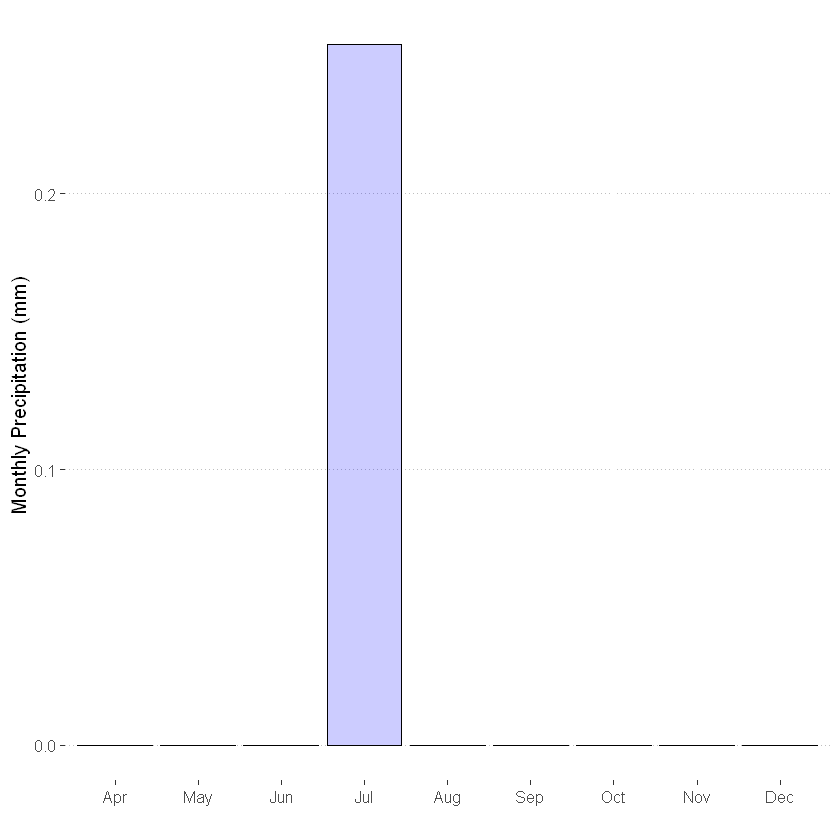

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

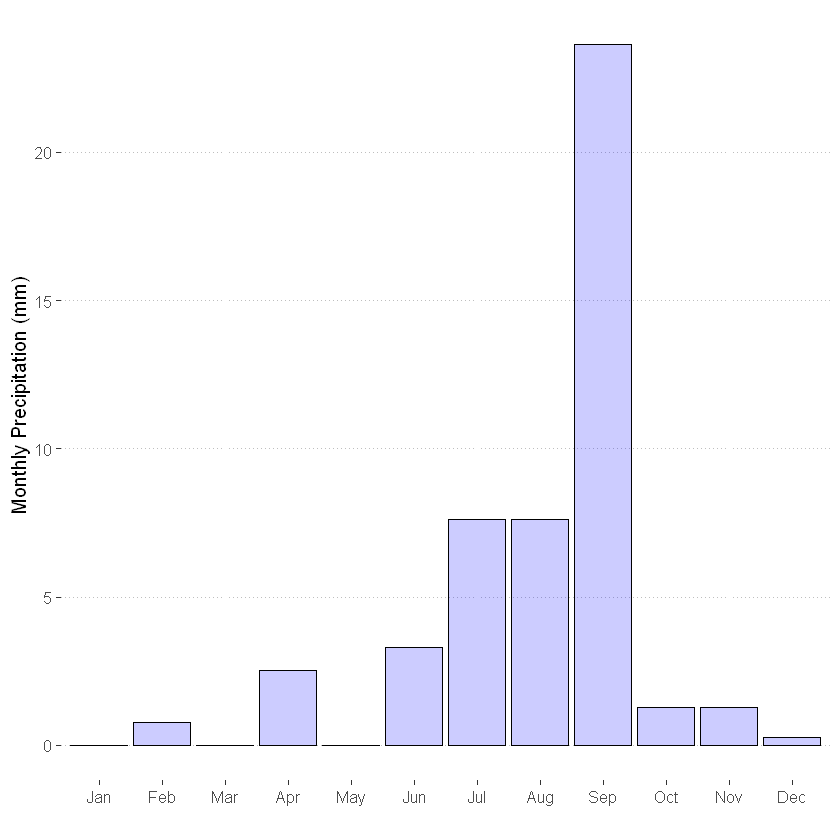

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

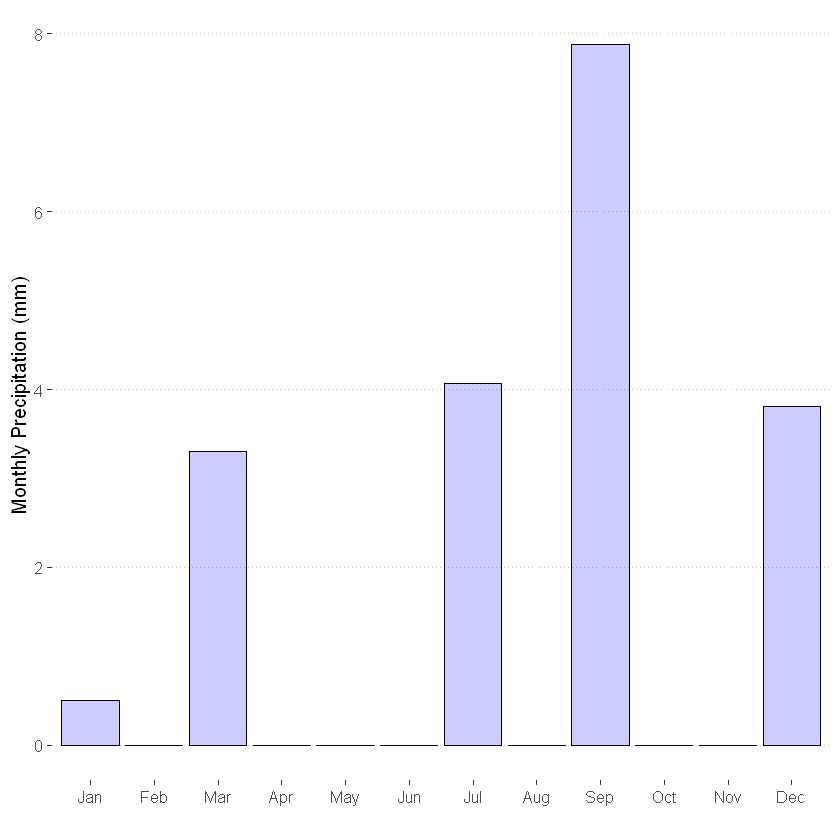

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

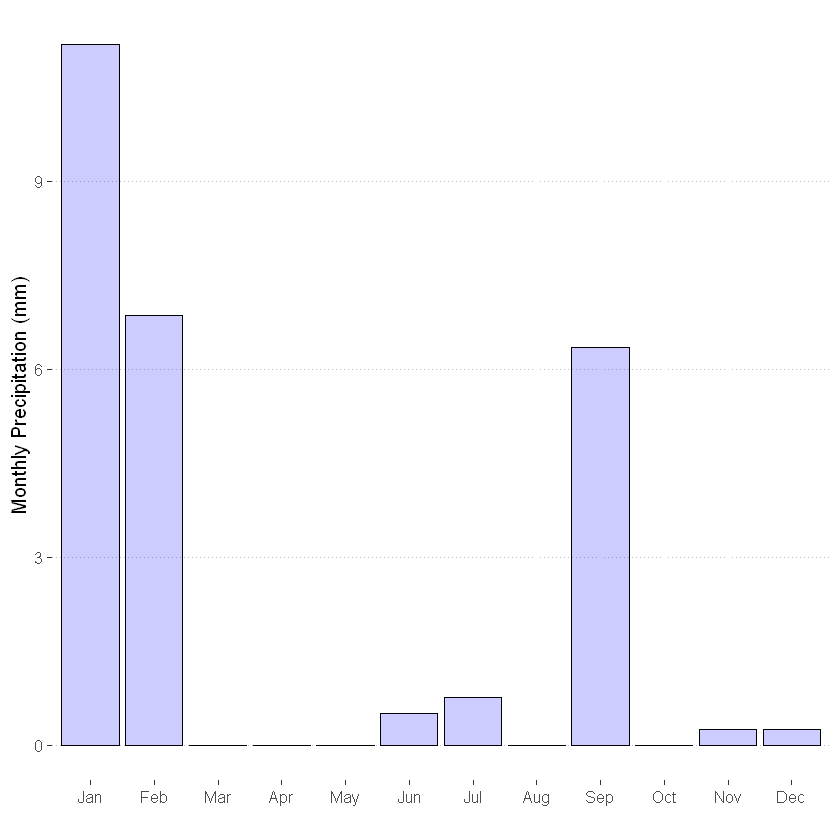

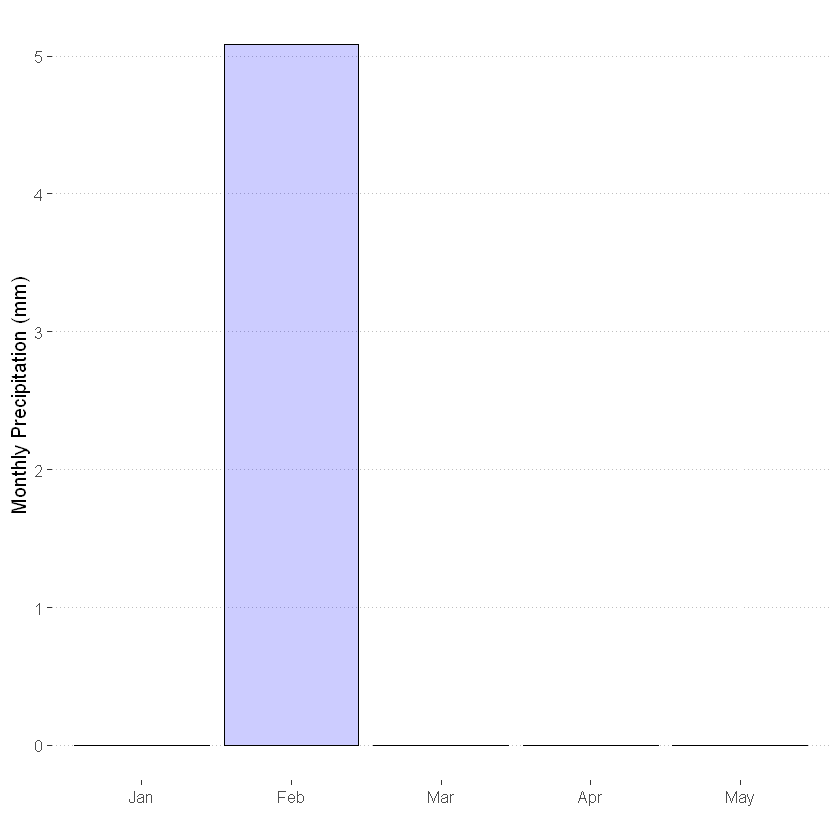

In [50]:
ggplot(data=MoP4, aes(x=MoP4$NMonth, y=MoP4$Precip)) + 
  geom_histogram(col="black", 
                 fill="blue", 
                 alpha = .2, stat = "identity") + 
  #labs(title="Monthly Precipitation") +
  labs(x="", y="Monthly Precipitation (mm)") + theme_pubclean()

ggplot(data=MoP5, aes(x=MoP5$NMonth, y=MoP5$Precip)) + 
  geom_histogram(col="black", 
                 fill="blue", 
                 alpha = .2, stat = "identity") + 
  #labs(title="Monthly Precipitation") +
  labs(x="", y="Monthly Precipitation (mm)") + theme_pubclean()

ggplot(data=MoP6, aes(x=MoP6$NMonth, y=MoP6$Precip)) + 
  geom_histogram(col="black", 
                 fill="blue", 
                 alpha = .2, stat = "identity") + 
  #labs(title="Monthly Precipitation") +
  labs(x="", y="Monthly Precipitation (mm)") + theme_pubclean()

ggplot(data=MoP7, aes(x=MoP7$NMonth, y=MoP7$Precip)) + 
  geom_histogram(col="black", 
                 fill="blue", 
                 alpha = .2, stat = "identity") + 
  #labs(title="Monthly Precipitation") +
  labs(x="", y="Monthly Precipitation (mm)") + theme_pubclean()

ggplot(data=MoP8, aes(x=MoP8$NMonth, y=MoP8$Precip)) + 
  geom_histogram(col="black", 
                 fill="blue", 
                 alpha = .2, stat = "identity") + 
  #labs(title="Monthly Precipitation") +
  labs(x="", y="Monthly Precipitation (mm)") + theme_pubclean()

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

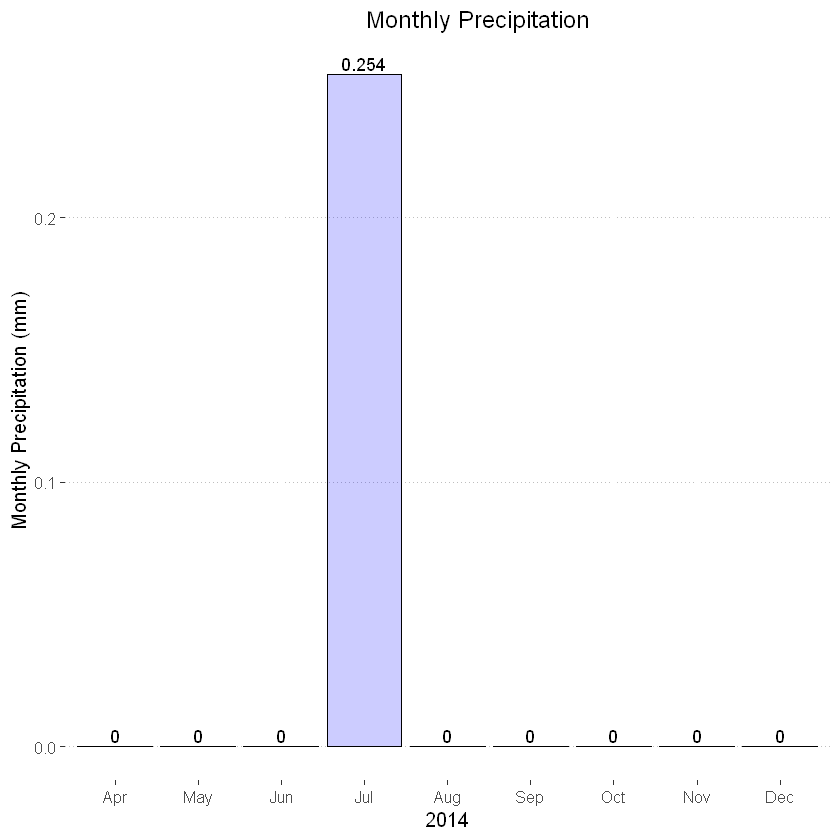

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

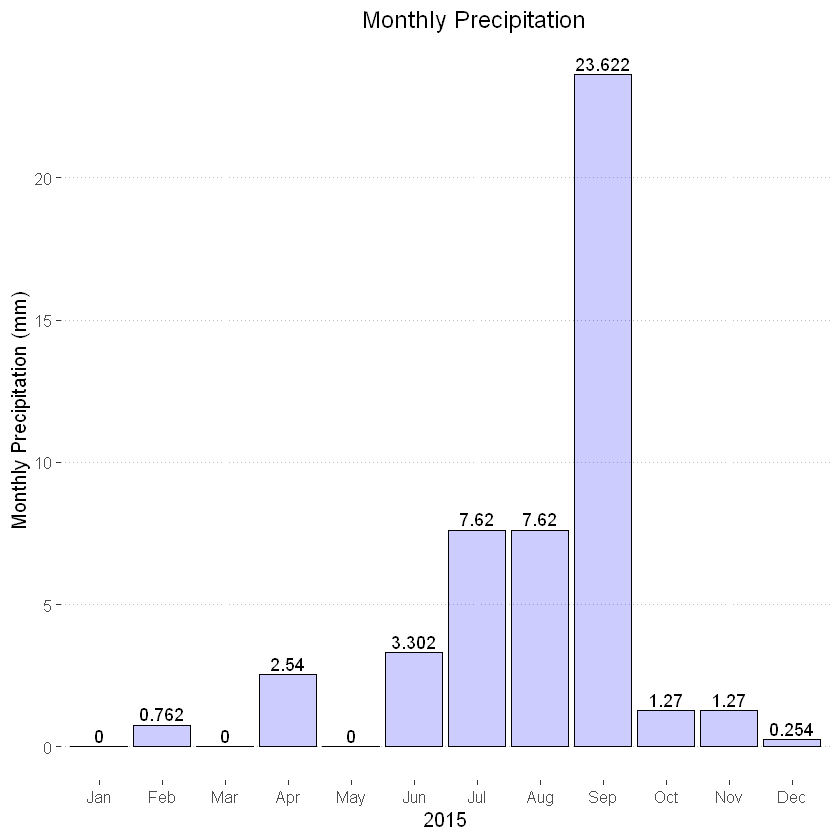

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

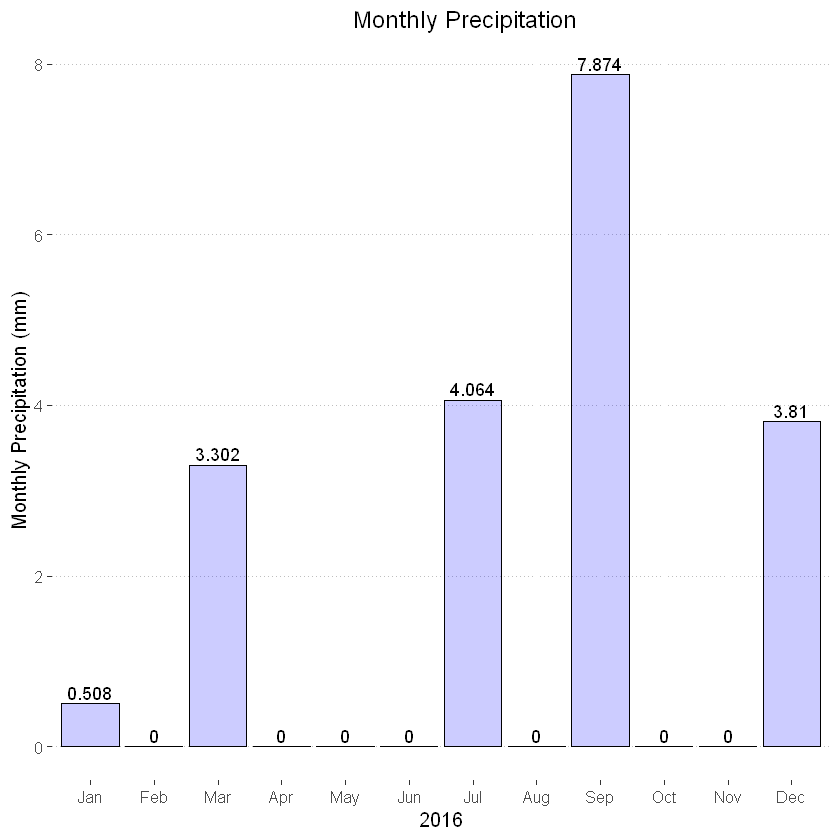

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

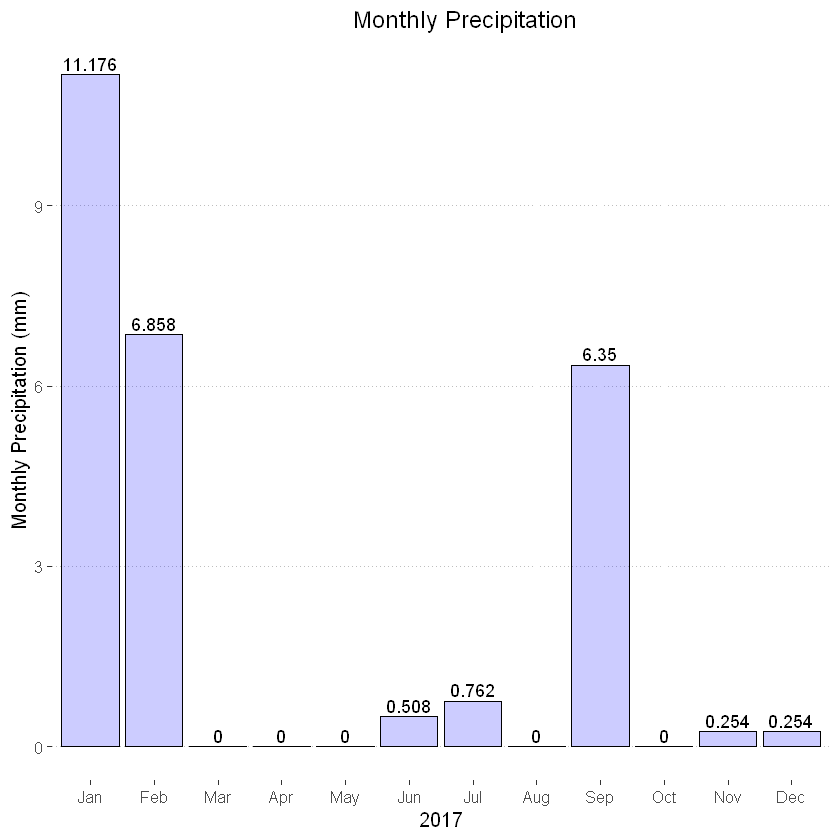

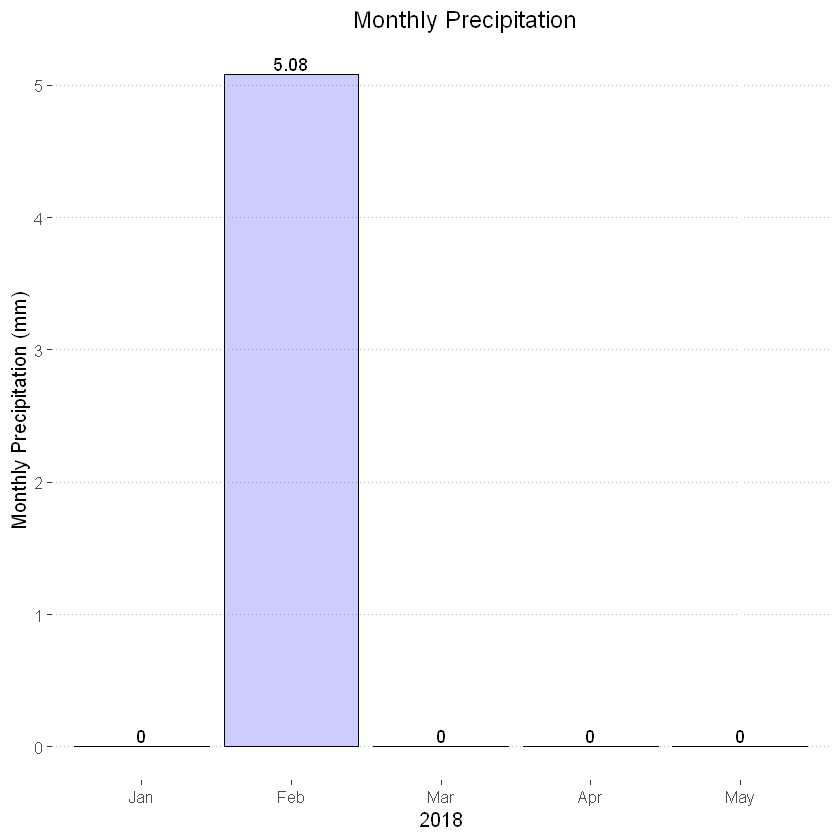

In [63]:
ggplot(MoP4, aes(x = NMonth, y = Precip)) +
  # geom_bar(fill = "#0073C2FF", stat = "identity") +
  geom_text(aes(label = Precip), vjust = -0.3) + 
  labs(x="2014", y="Monthly Precipitation (mm)") + theme_pubclean() +
  labs(title="                                           Monthly Precipitation") +
  geom_histogram(col="black", 
                 fill="blue", 
                 alpha = .2, stat = "identity")

ggplot(MoP5, aes(x = NMonth, y = Precip)) +
  # geom_bar(fill = "#0073C2FF", stat = "identity") +
  geom_text(aes(label = Precip), vjust = -0.3) + 
  labs(x="2015", y="Monthly Precipitation (mm)") + theme_pubclean() +
  labs(title="                                           Monthly Precipitation") +
  geom_histogram(col="black", 
                 fill="blue", 
                 alpha = .2, stat = "identity")

ggplot(MoP6, aes(x = NMonth, y = Precip)) +
  # geom_bar(fill = "#0073C2FF", stat = "identity") +
  geom_text(aes(label = Precip), vjust = -0.3) + 
  labs(x="2016", y="Monthly Precipitation (mm)") + theme_pubclean() +
  labs(title="                                           Monthly Precipitation") +
  geom_histogram(col="black", 
                 fill="blue", 
                 alpha = .2, stat = "identity")

ggplot(MoP7, aes(x = NMonth, y = Precip)) +
  # geom_bar(fill = "#0073C2FF", stat = "identity") +
  geom_text(aes(label = Precip), vjust = -0.3) + 
  labs(x="2017", y="Monthly Precipitation (mm)") + theme_pubclean() +
  labs(title="                                           Monthly Precipitation") +
  geom_histogram(col="black", 
                 fill="blue", 
                 alpha = .2, stat = "identity")

ggplot(MoP8, aes(x = NMonth, y = Precip)) +
  # geom_bar(fill = "#0073C2FF", stat = "identity") +
  geom_text(aes(label = Precip), vjust = -0.3) + 
  labs(x="2018", y="Monthly Precipitation (mm)") + theme_pubclean() +
  labs(title="                                           Monthly Precipitation") +
  geom_histogram(col="black", 
                 fill="blue", 
                 alpha = .2, stat = "identity")
